In [211]:
import os
from pathlib import Path

cur_dir_all = os.getcwd()
cur_dir_tail = os.path.split(cur_dir)[1]
print('cur_dir = ', cur_dir)
print('cur_dir_tail=', cur_dir_tail)
parent_dir = Path(cur_dir).parent
if cur_dir_tail == 'keyhandshapediscovery':
    print(cur_dir_tail, ' is ok')
    print(parent_dir, ' is the parent folder')
else:
    print(cur_dir_tail, ' is NOT ok')
    os.chdir(path)
    
assert(cur_dir_tail == 'keyhandshapediscovery', 'Expect problems because jupyter not running under keyhandshapediscovery folder')

cur_dir =  /home/wsubuntu/GitHub/keyhandshapediscovery
cur_dir_tail= keyhandshapediscovery
keyhandshapediscovery  is ok
/home/wsubuntu/GitHub  is the parent folder


<>:16: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:16: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:16: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<ipython-input-211-7fe0cfba98f8>:16: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(cur_dir_tail == 'keyhandshapediscovery', 'Expect problems because jupyter not running under keyhandshapediscovery folder')


In [212]:
import scriptFile as sf
import importlib as impL
import helperFuncs as funcH
import projRelatedHelperFuncs as prHF
import numpy as np
import matplotlib.pyplot as plt

In [213]:
import torch
import os
import helperFuncs as funcH
from pandas import DataFrame as pd_df
from sklearn.metrics import confusion_matrix
impL.reload(prHF)

figsize=(8,3) 
dpi=360

cf_int = 543
impL.reload(funcH)
experiments_folder = funcH.directory_find('cf{:d}'.format(cf_int), root=funcH.getVariableByComputerName('data_dir'))
print(experiments_folder)

# update_centroid_df
# analyze_correspondance_results
# map_predictions
# _cumsum_preds - prHF.cumsum_preds
# calc_tup_sc - prHF.calc_tup_sc

search went up by 0</mnt/SSD_Data/DataPath>
search went up by 0</mnt/SSD_Data>
/mnt/SSD_Data/vaesae_experiments_cor/exp_conv_ae_simple_is256_cf543


59
dict_keys(['epoch0009', 'epoch0014', 'epoch0019', 'epoch0024', 'epoch0029', 'epoch0034', 'epoch0039', 'epoch0044', 'epoch0049', 'epoch0054', 'epoch0059', 'epoch0064', 'epoch0069', 'epoch0074', 'epoch0079', 'epoch0084', 'epoch0089', 'epoch0094', 'epoch0099', 'epoch0104', 'epoch0109', 'epoch0114', 'epoch0119', 'epoch0124', 'epoch0129', 'epoch0134', 'epoch0139', 'epoch0144', 'epoch0149', 'epoch0154', 'epoch0159', 'epoch0164', 'epoch0169', 'epoch0174', 'epoch0179', 'epoch0184', 'epoch0189', 'epoch0194', 'epoch0199', 'epoch0204', 'epoch0209', 'epoch0214', 'epoch0219', 'epoch0224', 'epoch0229', 'epoch0234', 'epoch0239', 'epoch0244', 'epoch0249', 'epoch0254', 'epoch0259', 'epoch0264', 'epoch0269', 'epoch0274', 'epoch0279', 'epoch0284', 'epoch0289', 'epoch0294', 'epoch0299'])
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
general_acc_for(sil_sort): 0.9518144987501077
ma

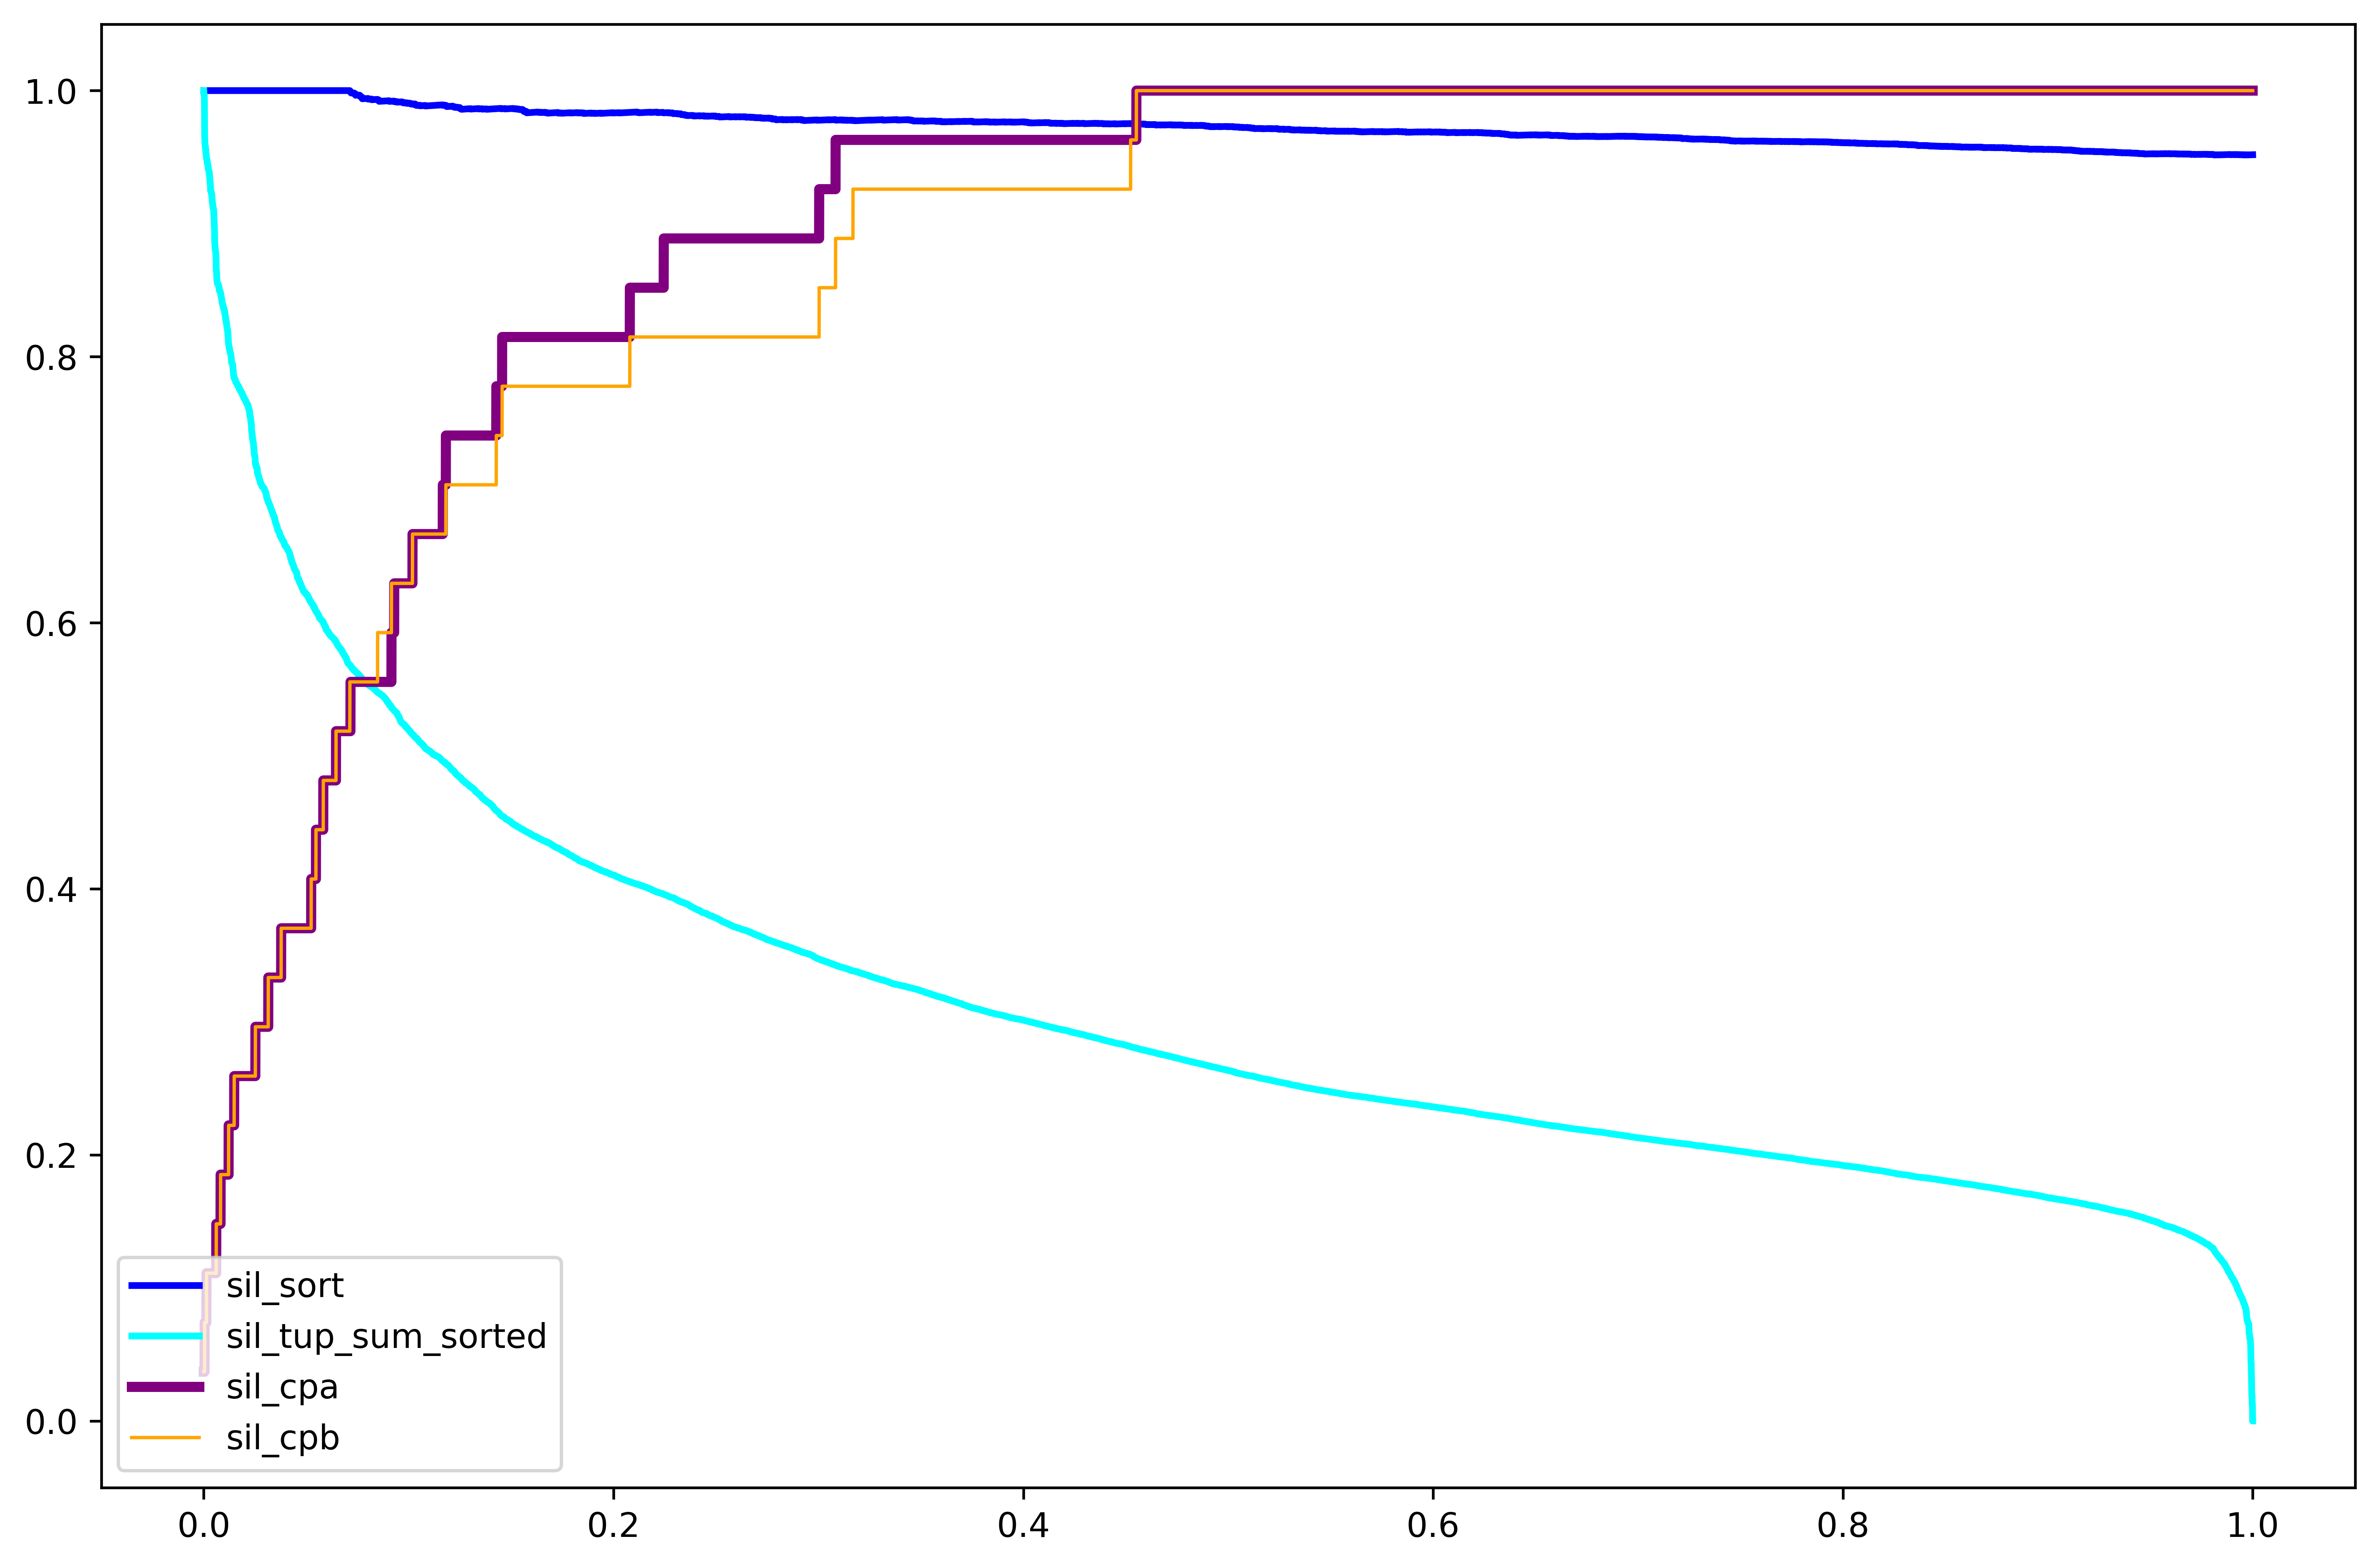

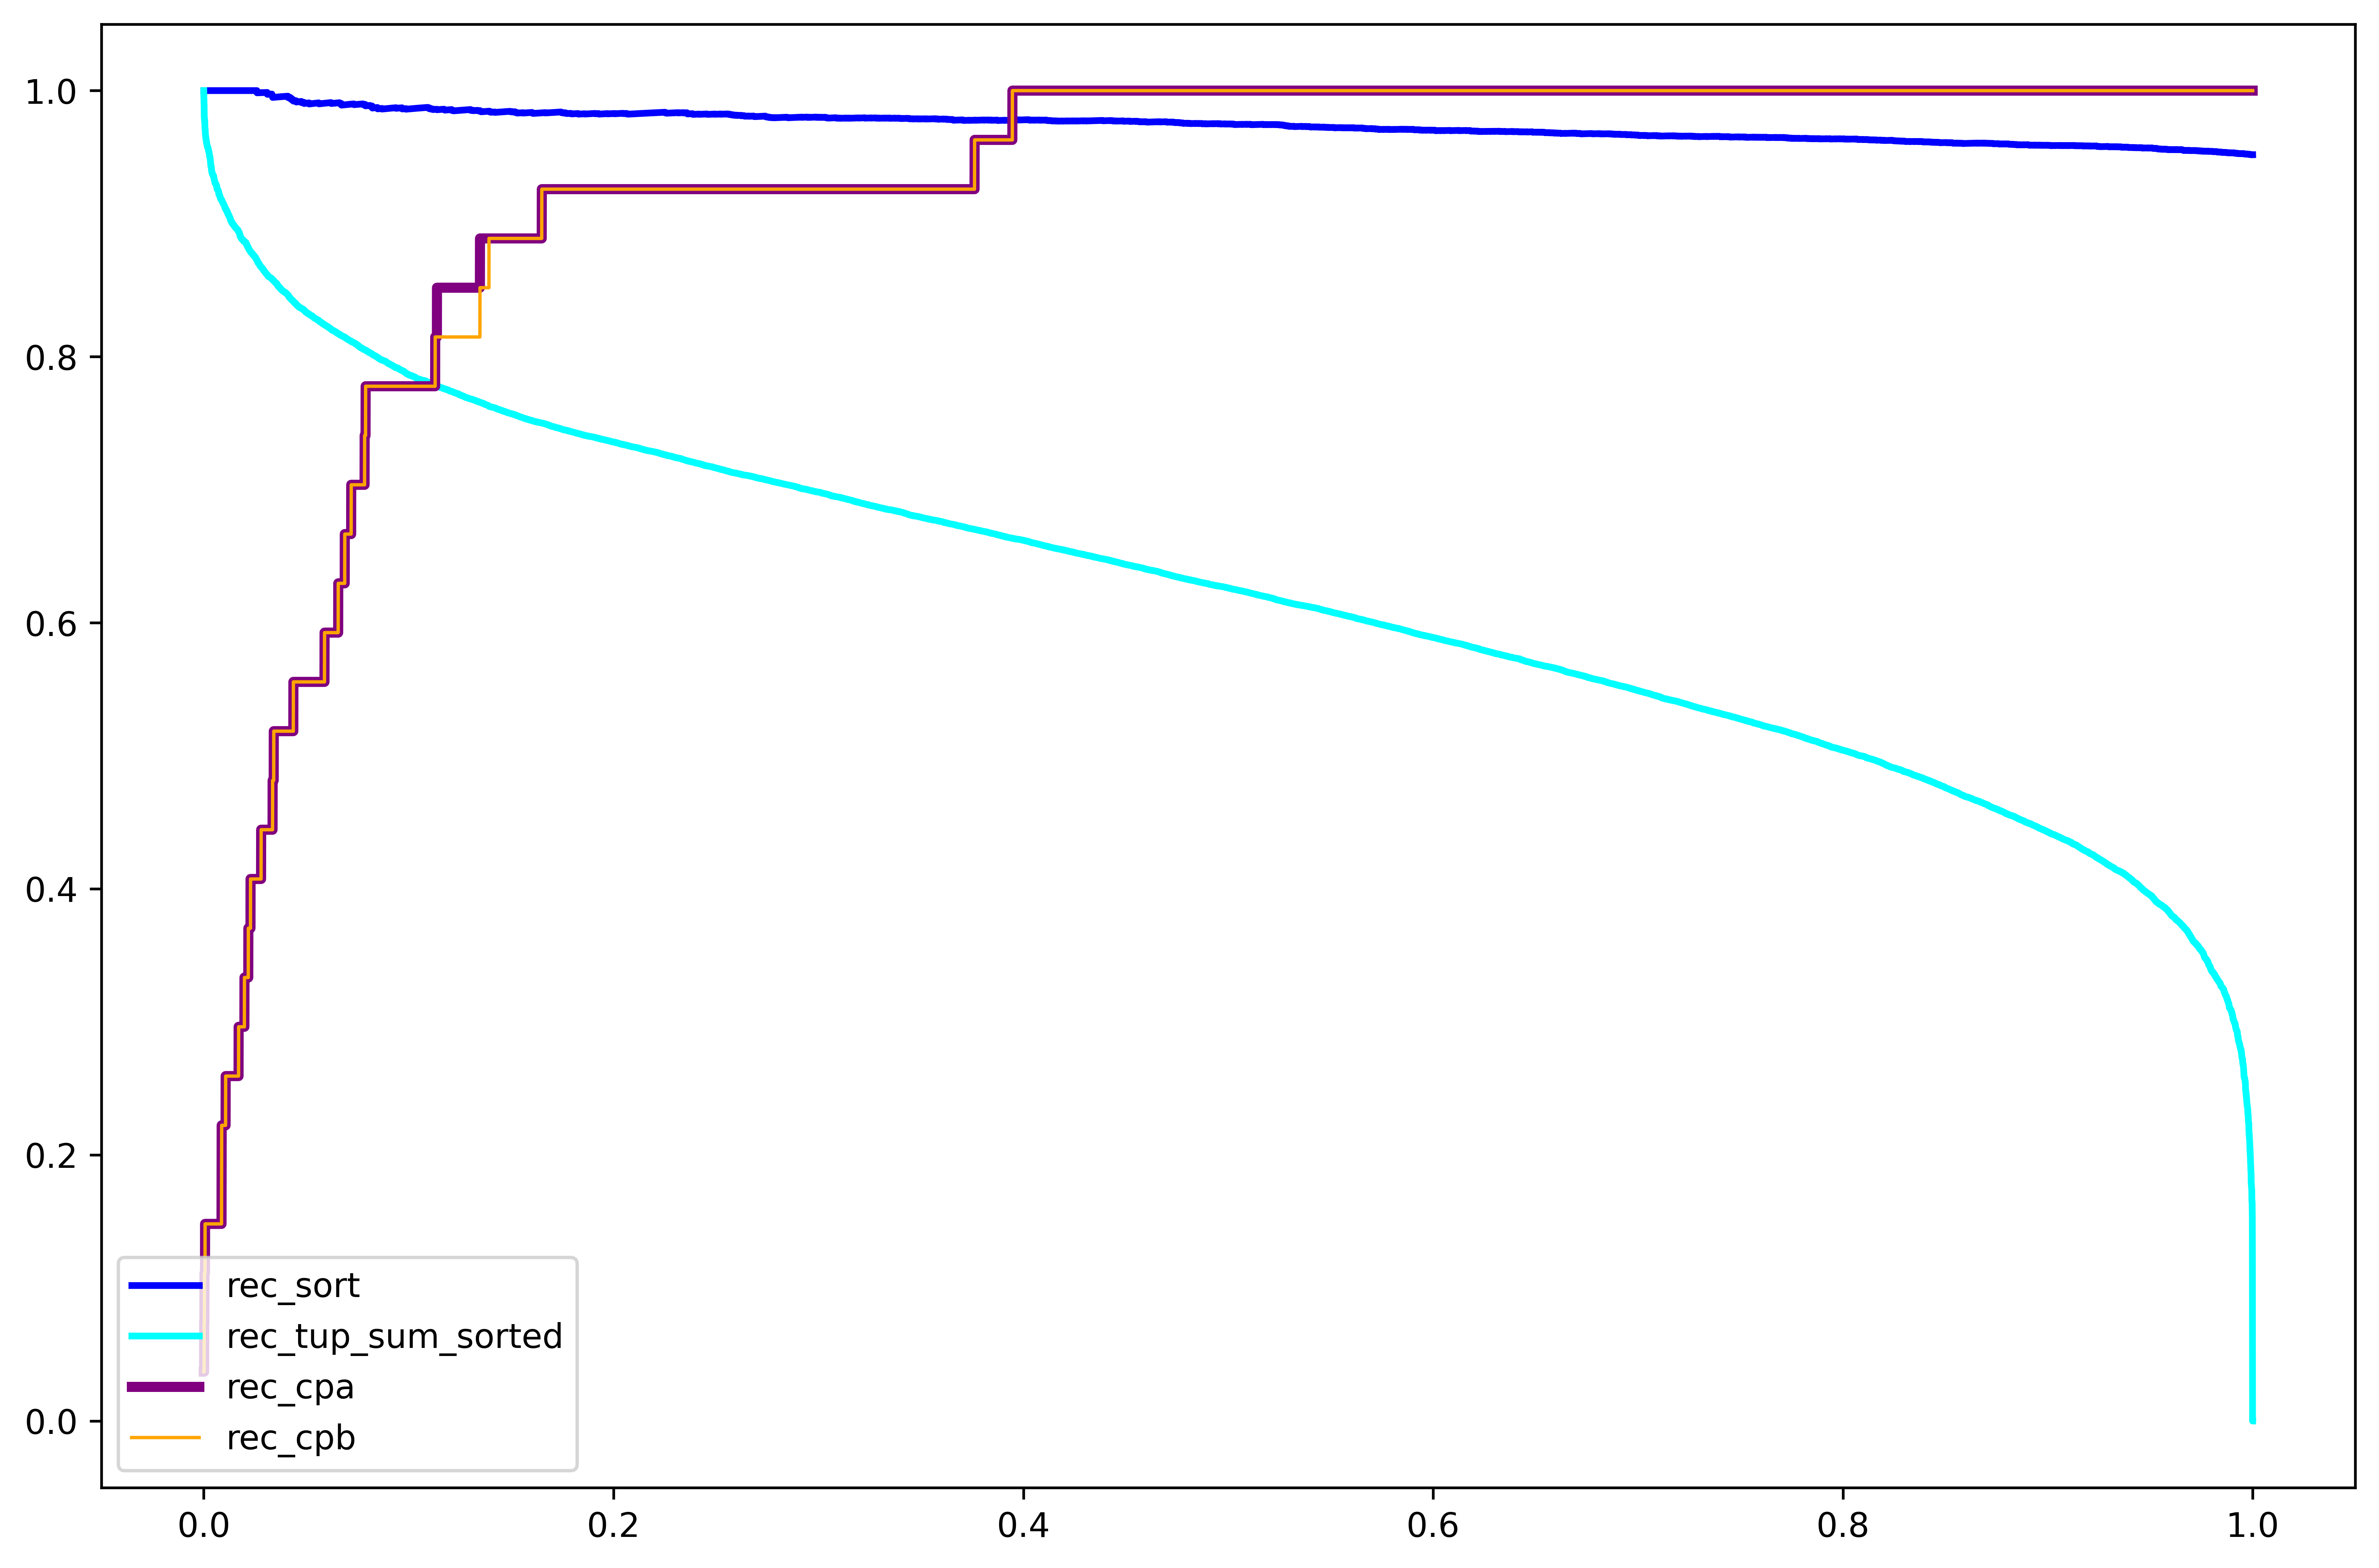

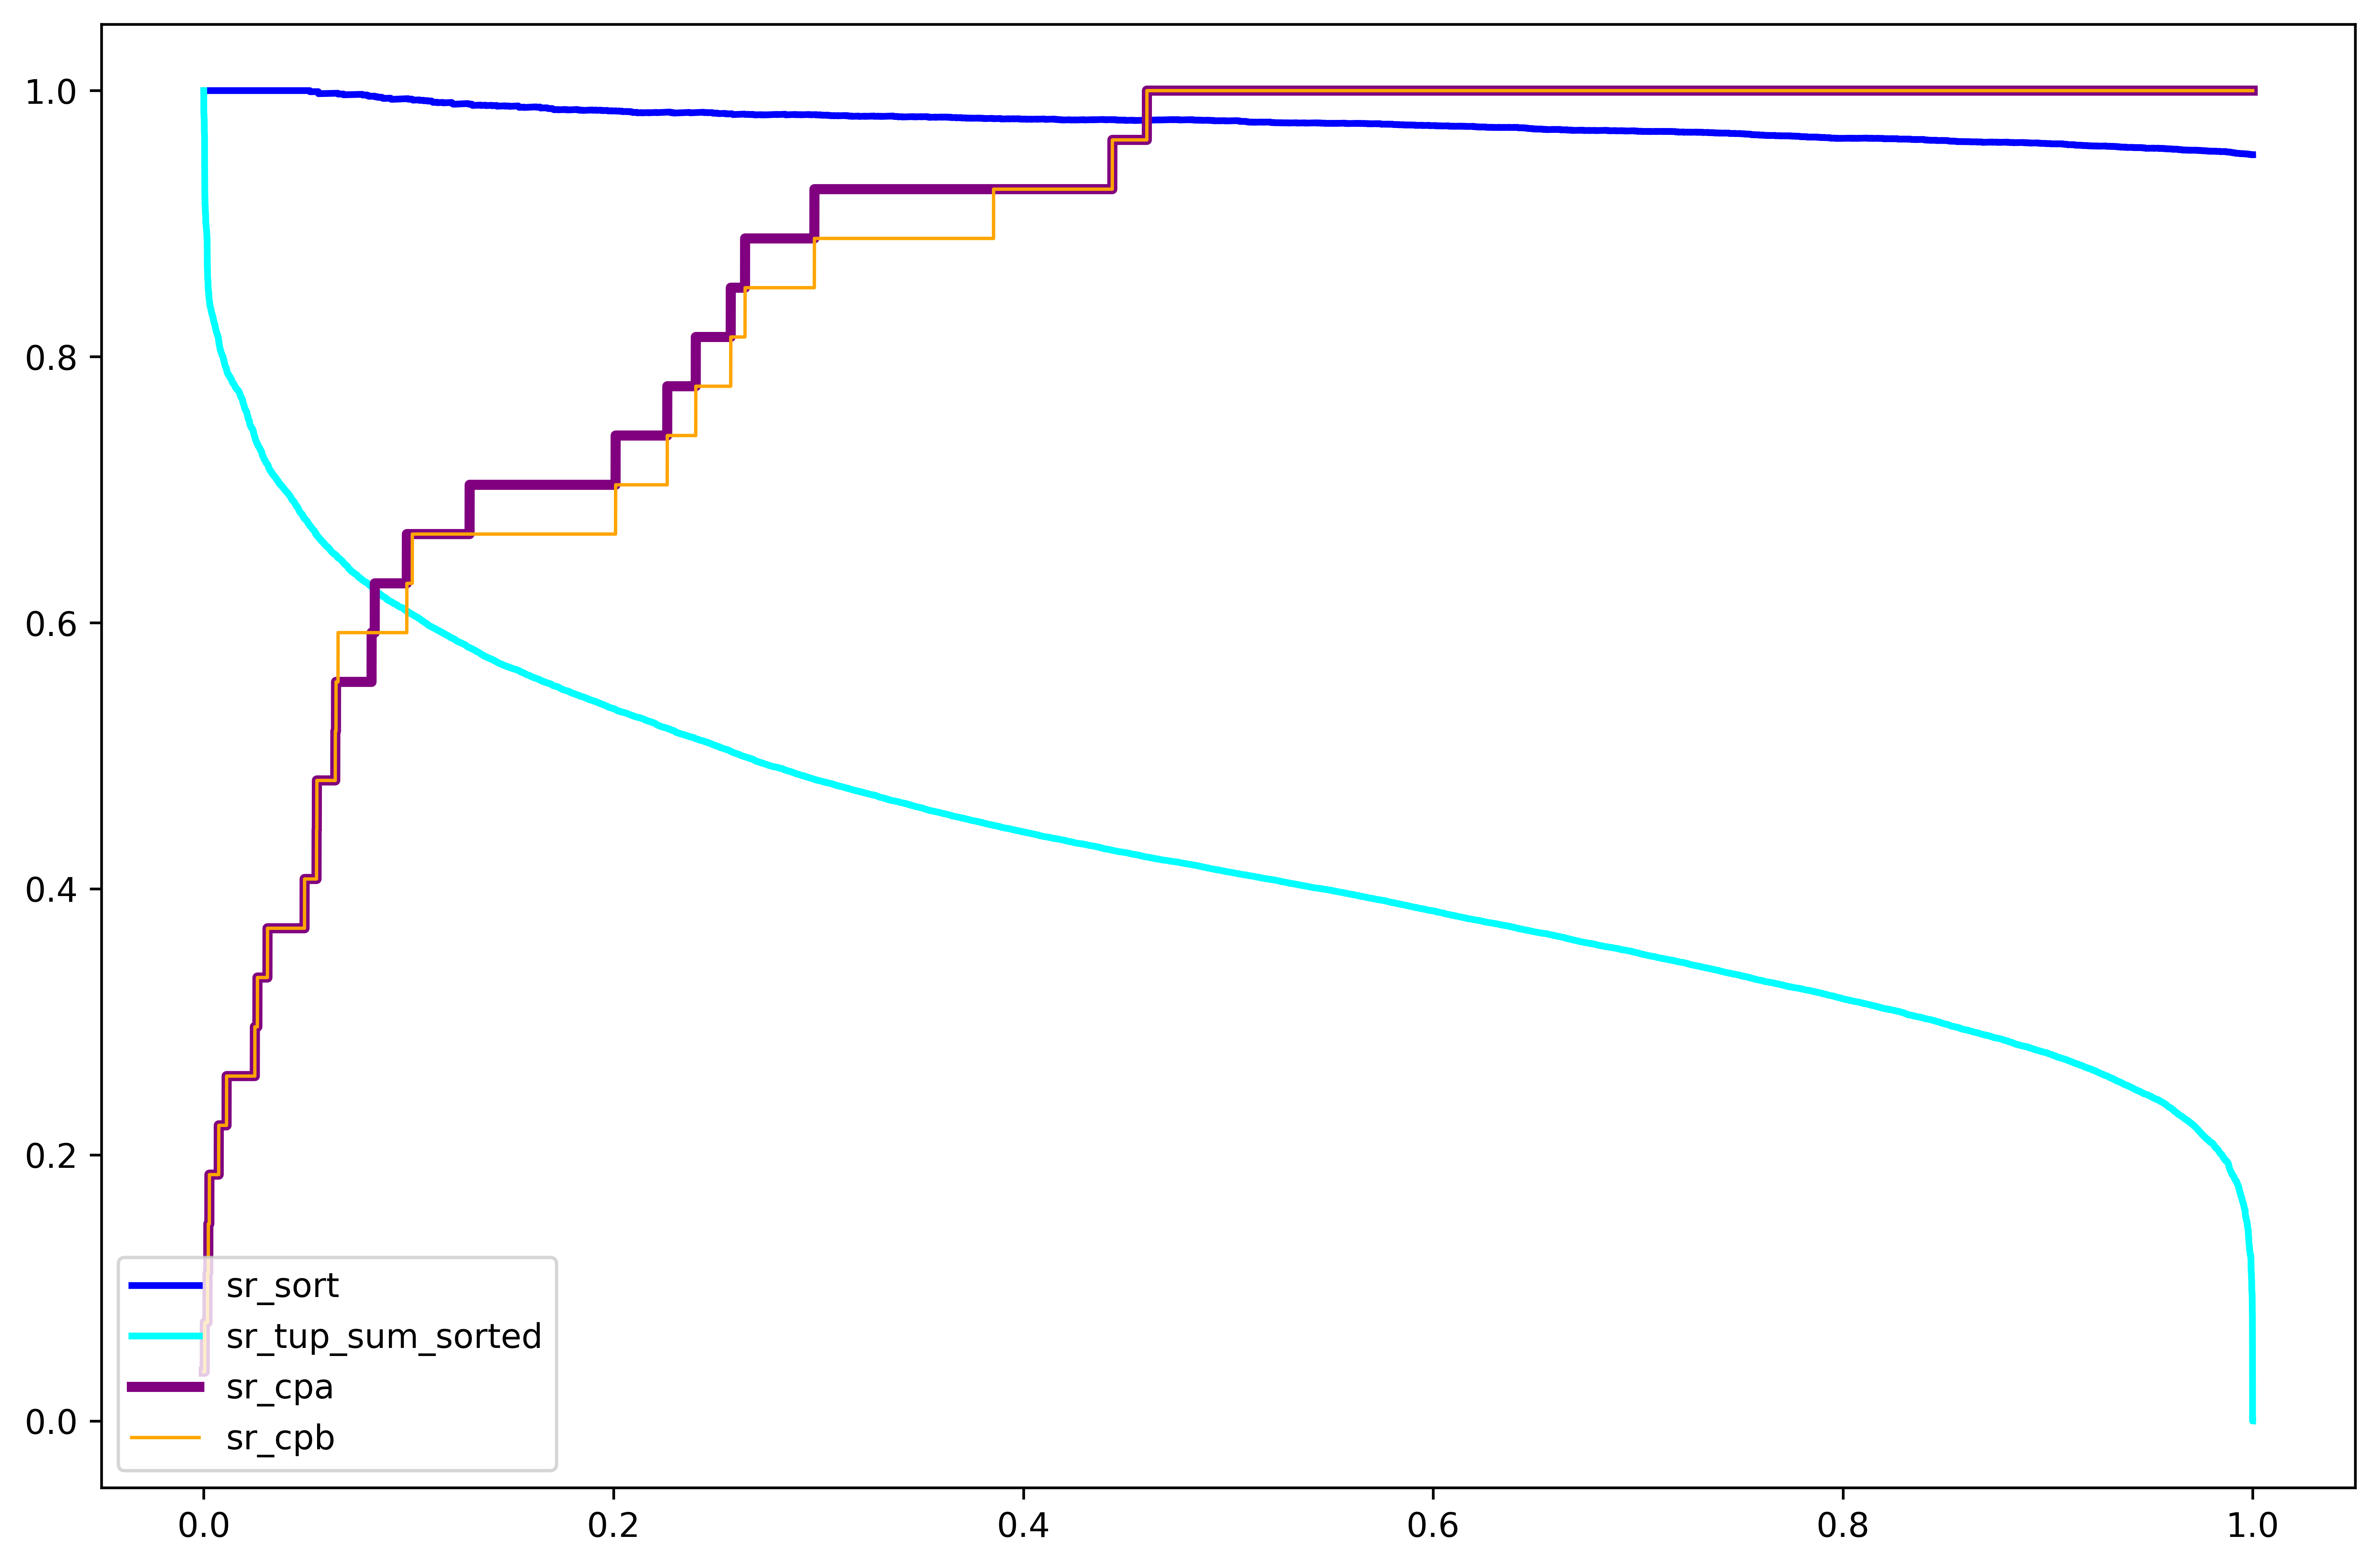

*-*-*Saving(/mnt/SSD_Data/vaesae_experiments_cor/exp_conv_ae_simple_is256_cf543/plots/compare299_0.9518.jpeg)


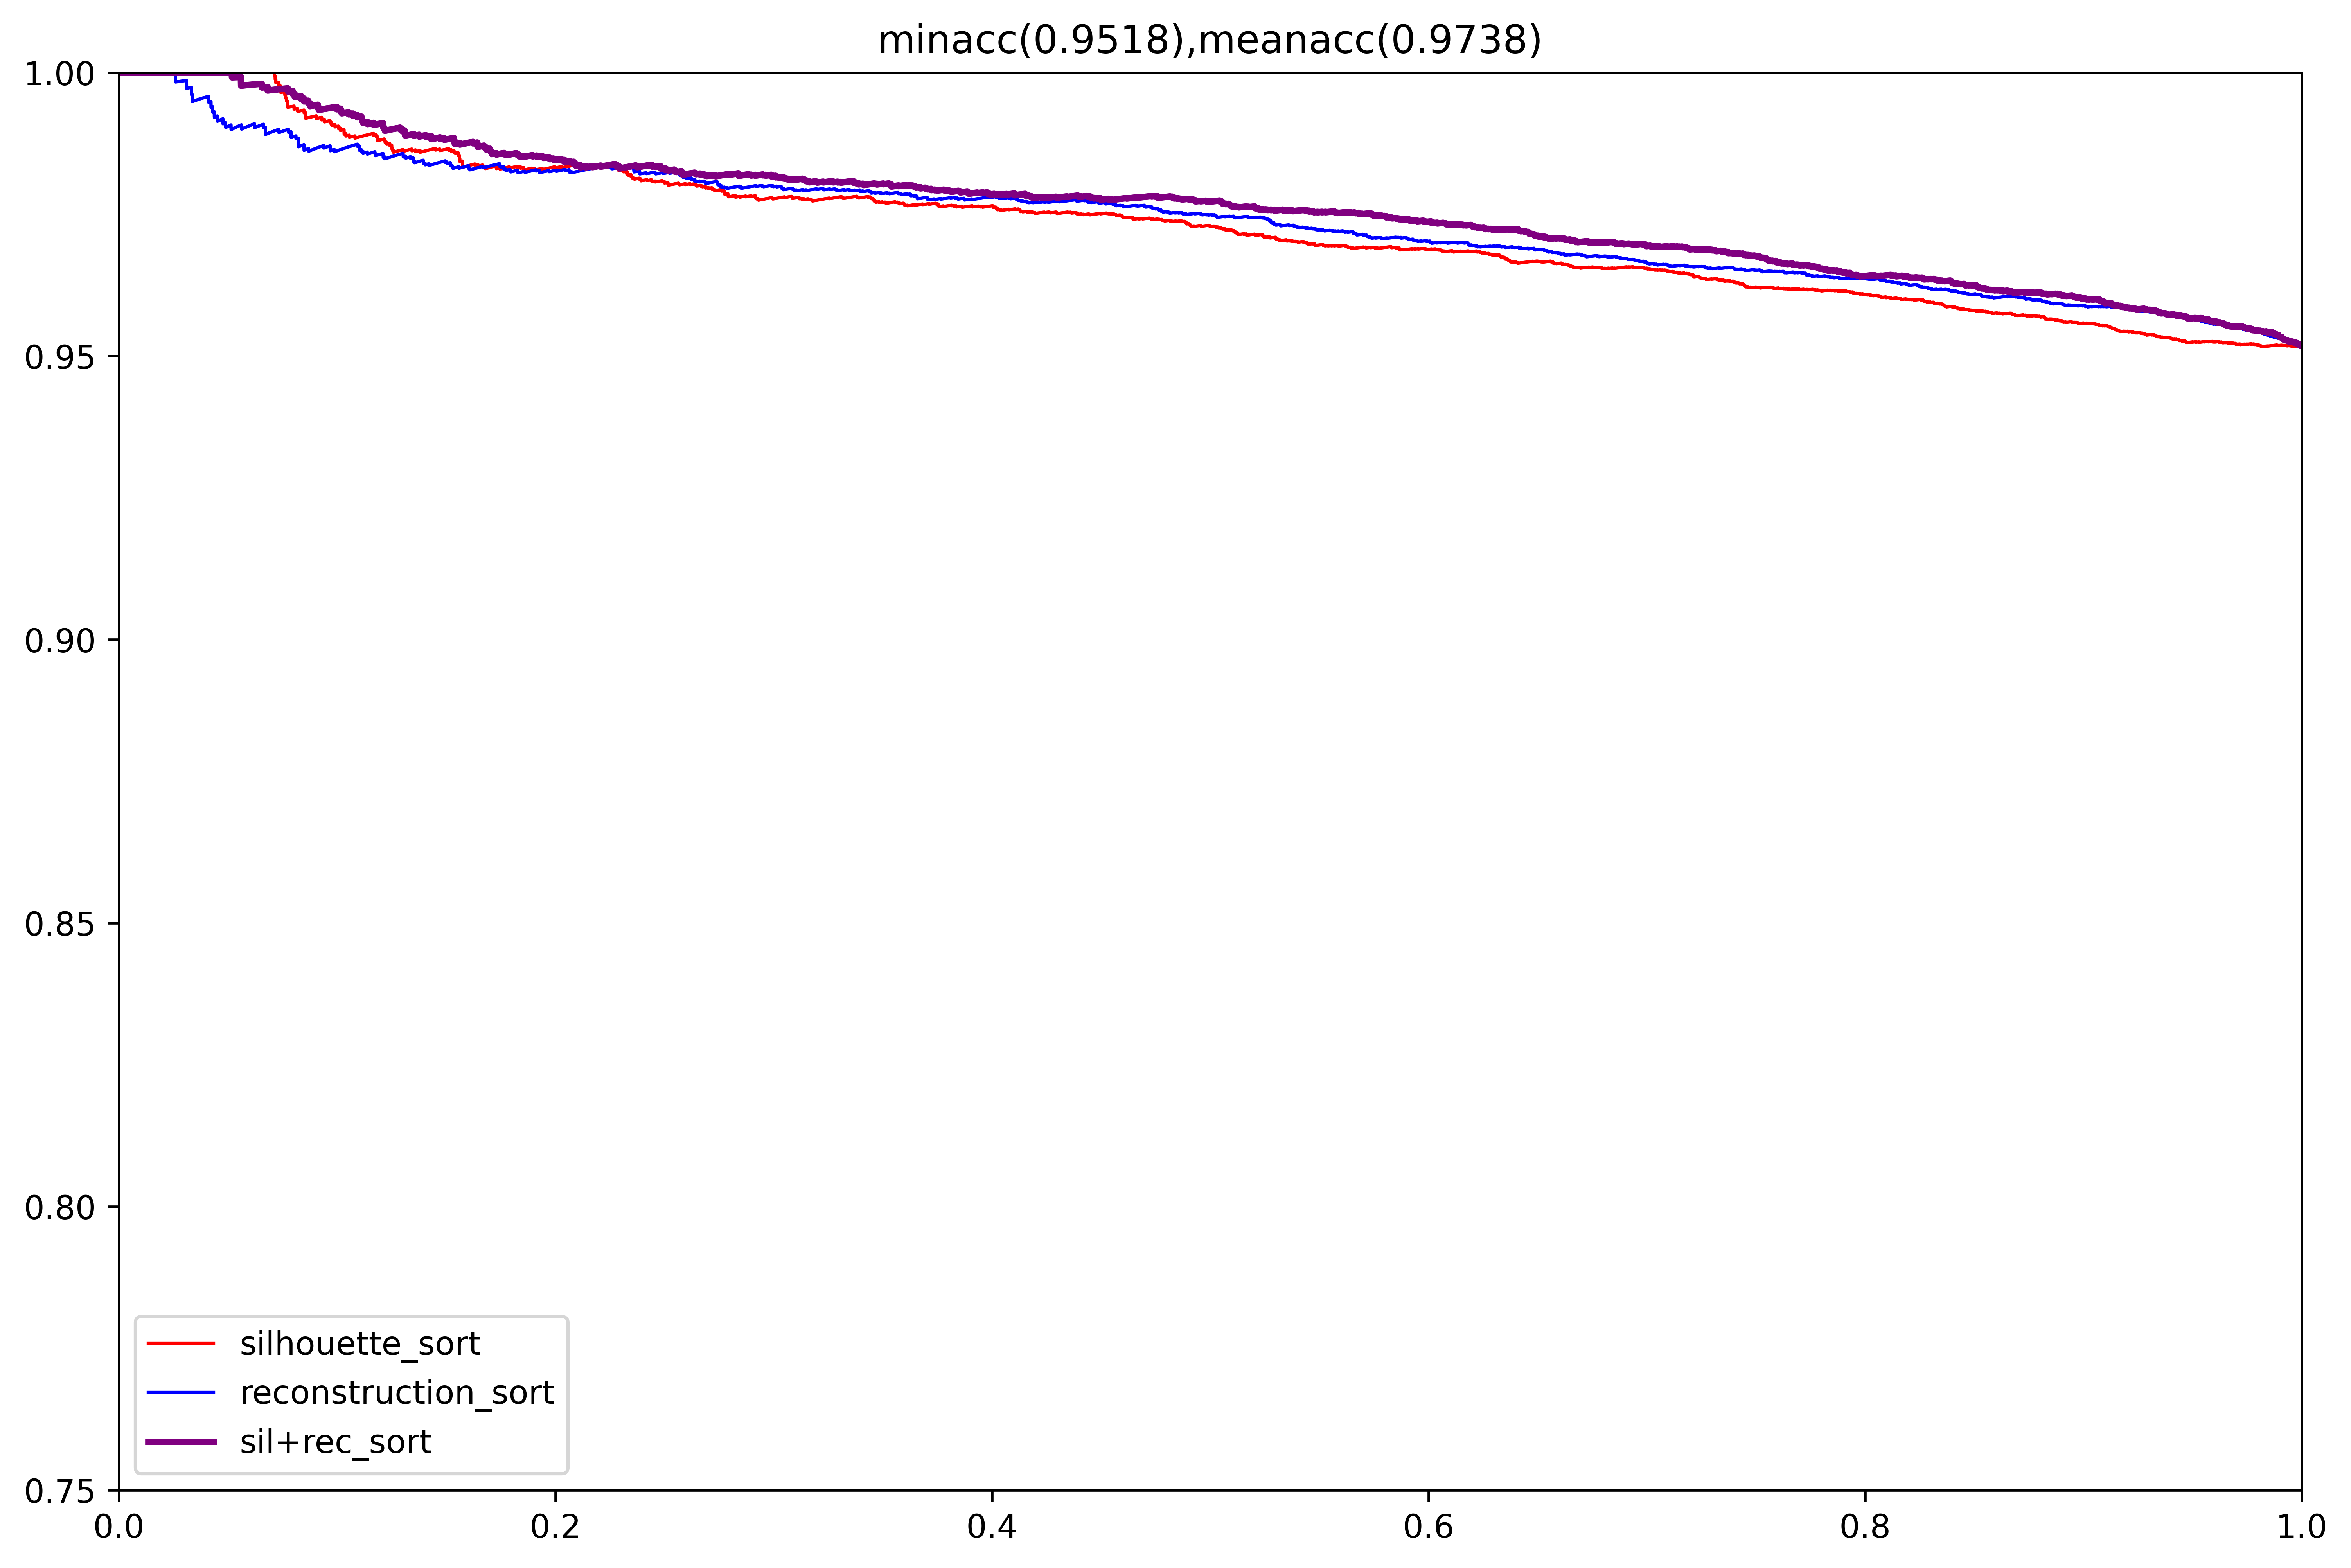

In [214]:
impL.reload(prHF)

exp_fold = experiments_folder
silhouette_reconstruction_sort_file = os.path.join(exp_fold, "silhouette_reconstruction.torch")
sil_var = torch.load(silhouette_reconstruction_sort_file, map_location=torch.device('cpu'))
print(len(sil_var))
print(sil_var.keys())
if True:
    for ep_str in sil_var.keys():
        _evs = prHF.get_epoch(ep_str=ep_str, sil_var=sil_var)
        epoch_id = int(ep_str.replace("epoch", ""))
        prHF.calc_tup_sc(_evs["silhouette_values"], _evs["reconstruction_loss"], 
                         _evs["correspondance_tuple"], _evs["labels"], 
                         ep_id=epoch_id, experiments_folder=exp_fold)
else:
    _evs = prHF.get_epoch(ep_str='epoch0299', sil_var=sil_var)
    epoch_id = 299
    prHF.calc_tup_sc(_evs["silhouette_values"], _evs["reconstruction_loss"], 
                     _evs["correspondance_tuple"], _evs["labels"], 
                     ep_id=epoch_id, experiments_folder=exp_fold)

In [215]:
kluster_centroids = prHF.update_centroid_df(_evs["kluster_centroids"], _evs["predictions"])
prHF.analyze_correspondance_results(_evs["correspondance_tuple"], _evs["kluster_centroids"], _evs["predictions"], _evs["labels"])

correspondance results:
        labels  sampleCounts
labels                      
0            0          1977
1           25          2542
2           60          2343
3           12           396
4           16           447
5           45          1207
6           18           623
7           28           288
8           48           455
10         300          2138
11          99           490
12          72          1180
13          52           267
14          84           548
15         210           856
16          96           554
17          17           124
18          54           221
19         494          1836
20         140           917
21          63           564
22         154           919
23         138           737
25          25           144
26         520          1429
_confMat_corr_preds - acc(100.0000)
confMat - acc(95.2360), correspondance match:
       0      1      2     3     4     5     6     7     8    9   ...   17  \
0   9450      0      2     6    1

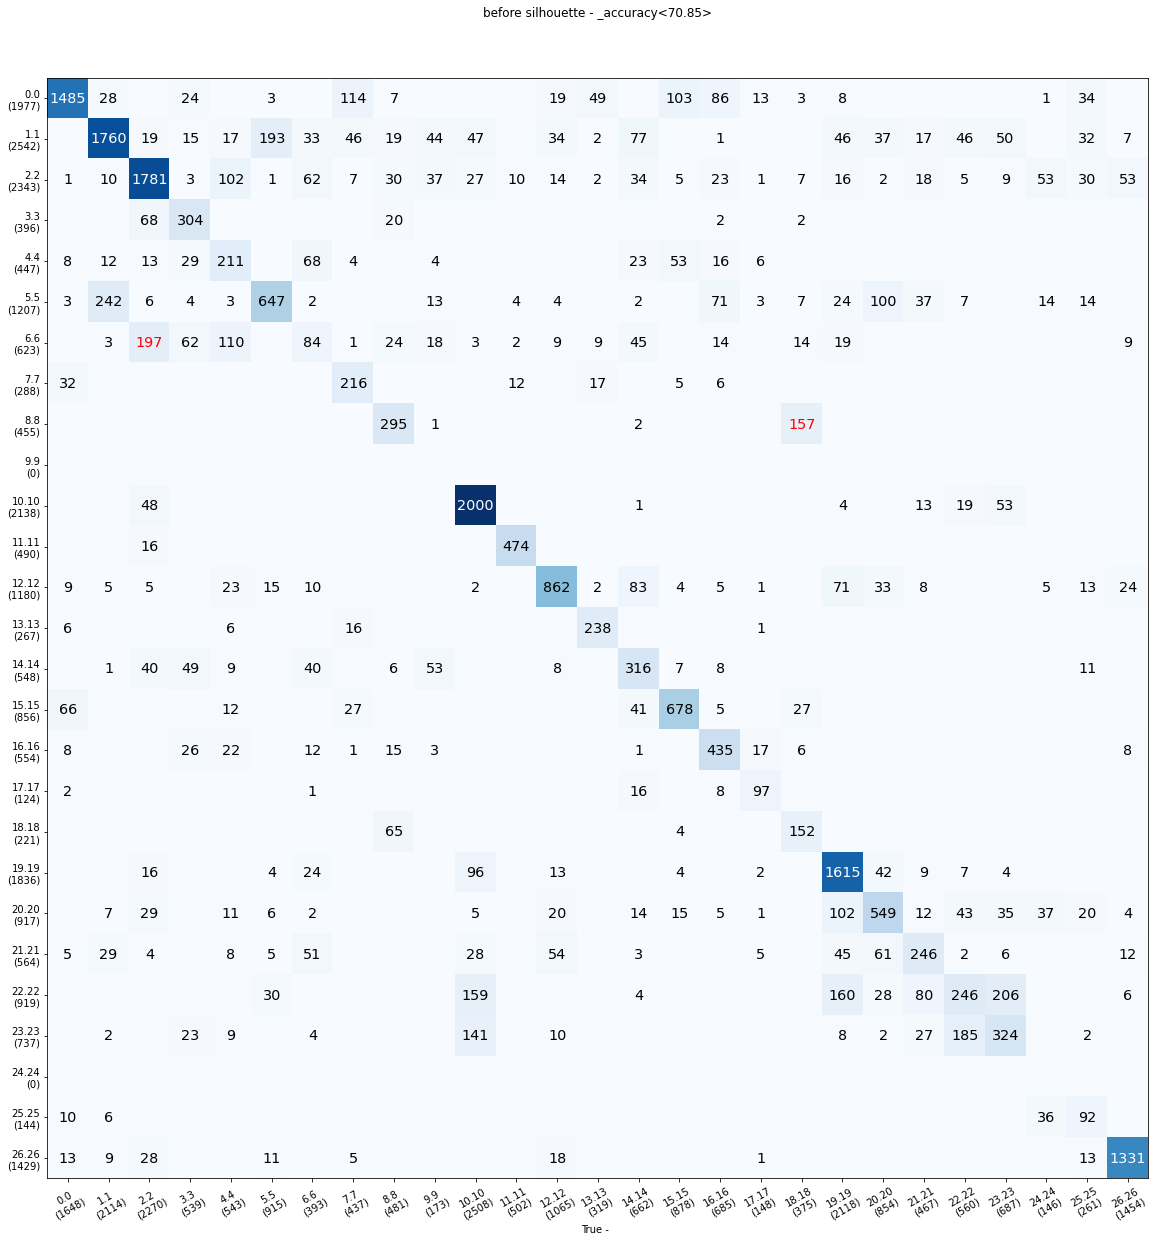

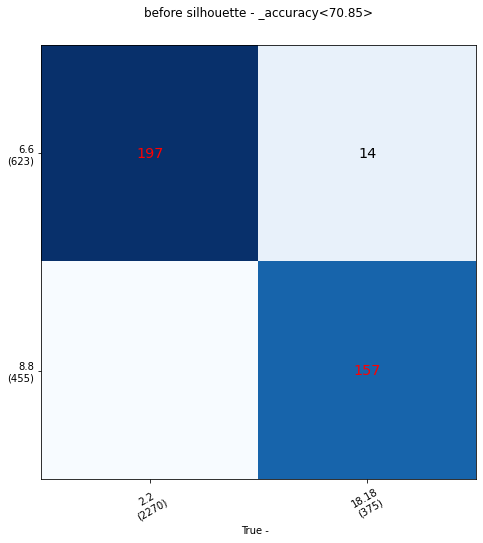

/home/wsubuntu/anaconda3/envs/khs_ws5/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


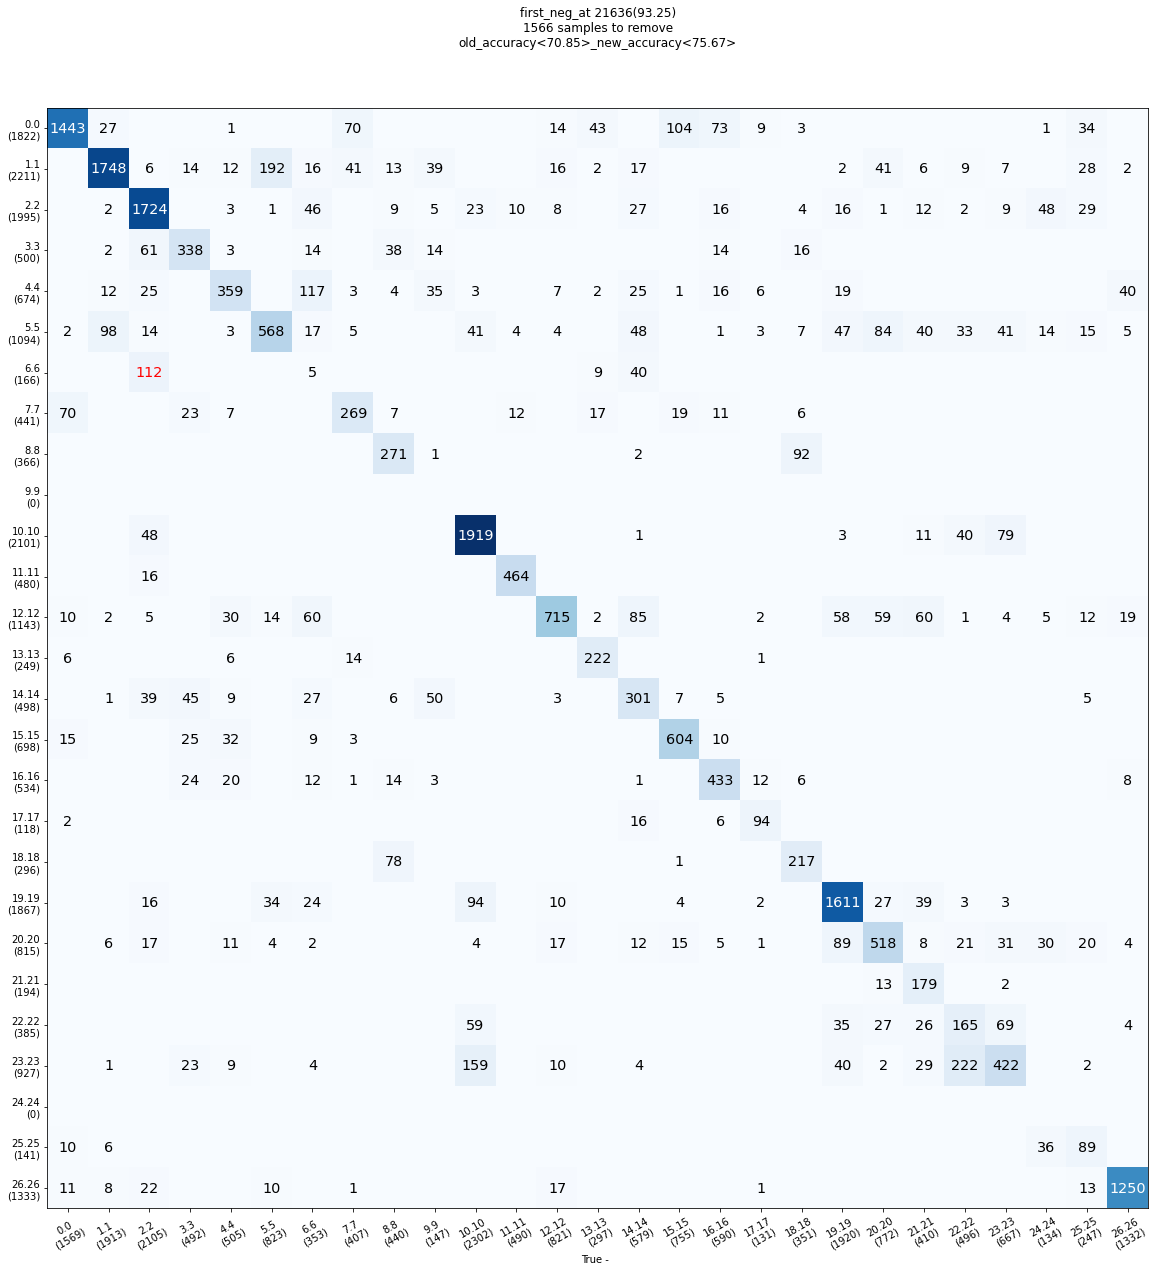

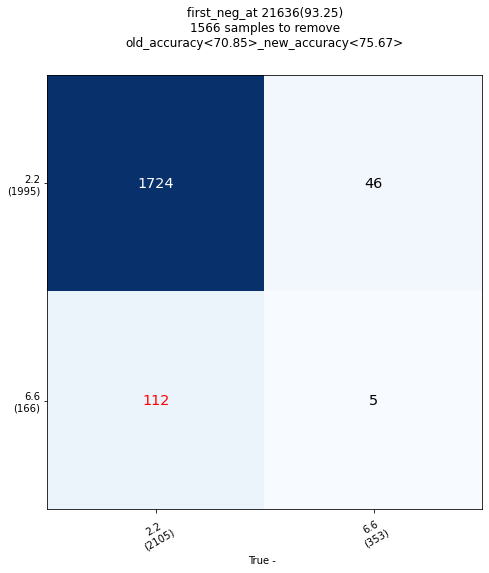

*-*-*
*-*-*


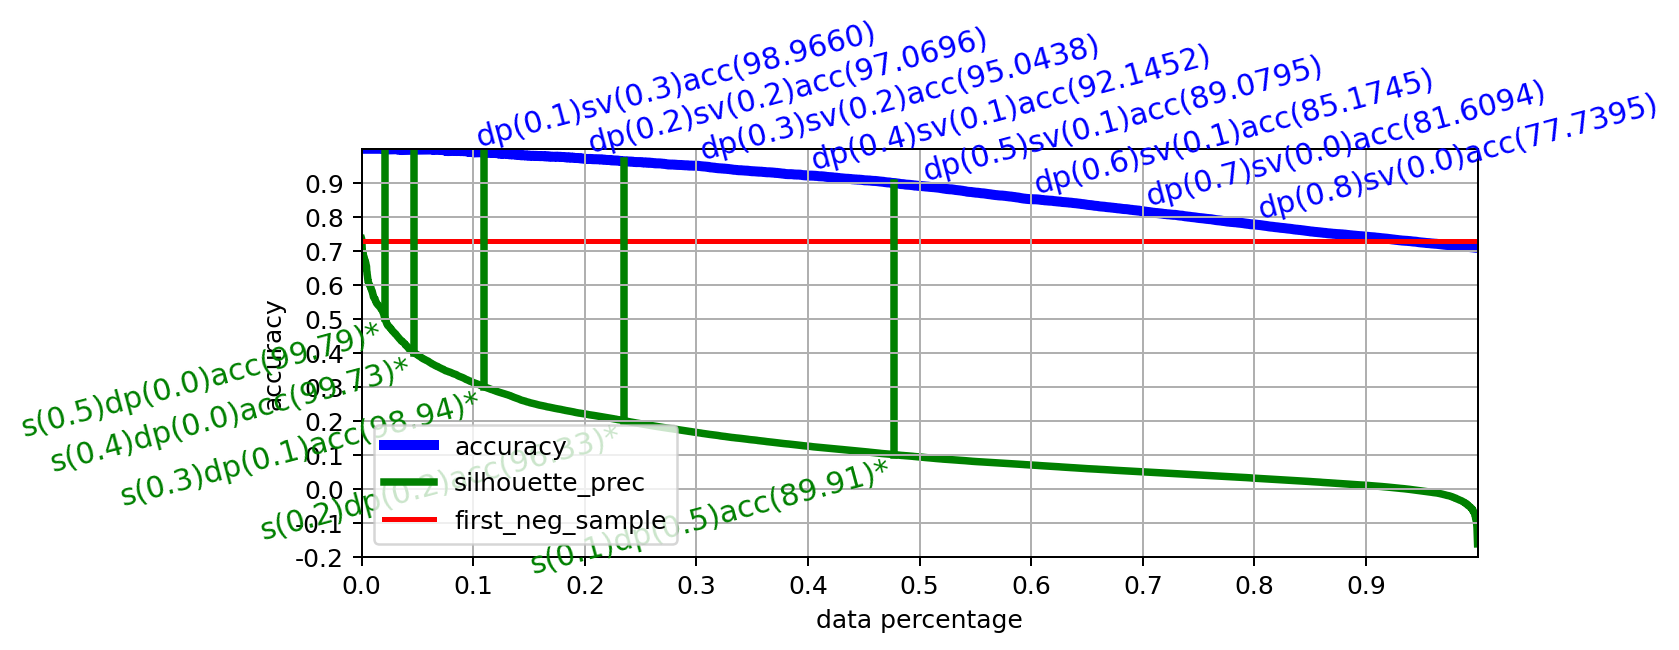

In [216]:
result_dict = prHF.analyze_silhouette_values(_evs["silhouette_values"], _evs["predictions"], _evs["labels"],
                                    centroid_info_pdf=_evs["kluster_centroids"],
                                    label_names=None, conf_plot_save_to='',
                                    figsize=figsize, lw=[4, 3, 2], show_title=False, str_deg=15, str_size=12)

In [217]:
sil_val_sorted, sil_idx = funcH.sortVec(_evs["silhouette_values"])
rec_los_sorted, rec_idx = funcH.sortVec(-_evs["reconstruction_loss"])
rec_los_sorted_0_1 = funcH.map_0_1(-rec_los_sorted)
predictions_mapped = funcH.map_predictions(_evs["labels"], _evs["predictions"], centroid_info_pdf=_evs["kluster_centroids"])
print(np.min(rec_los_sorted), np.max(rec_los_sorted))

-91.05188 -37.593056


0.40343237

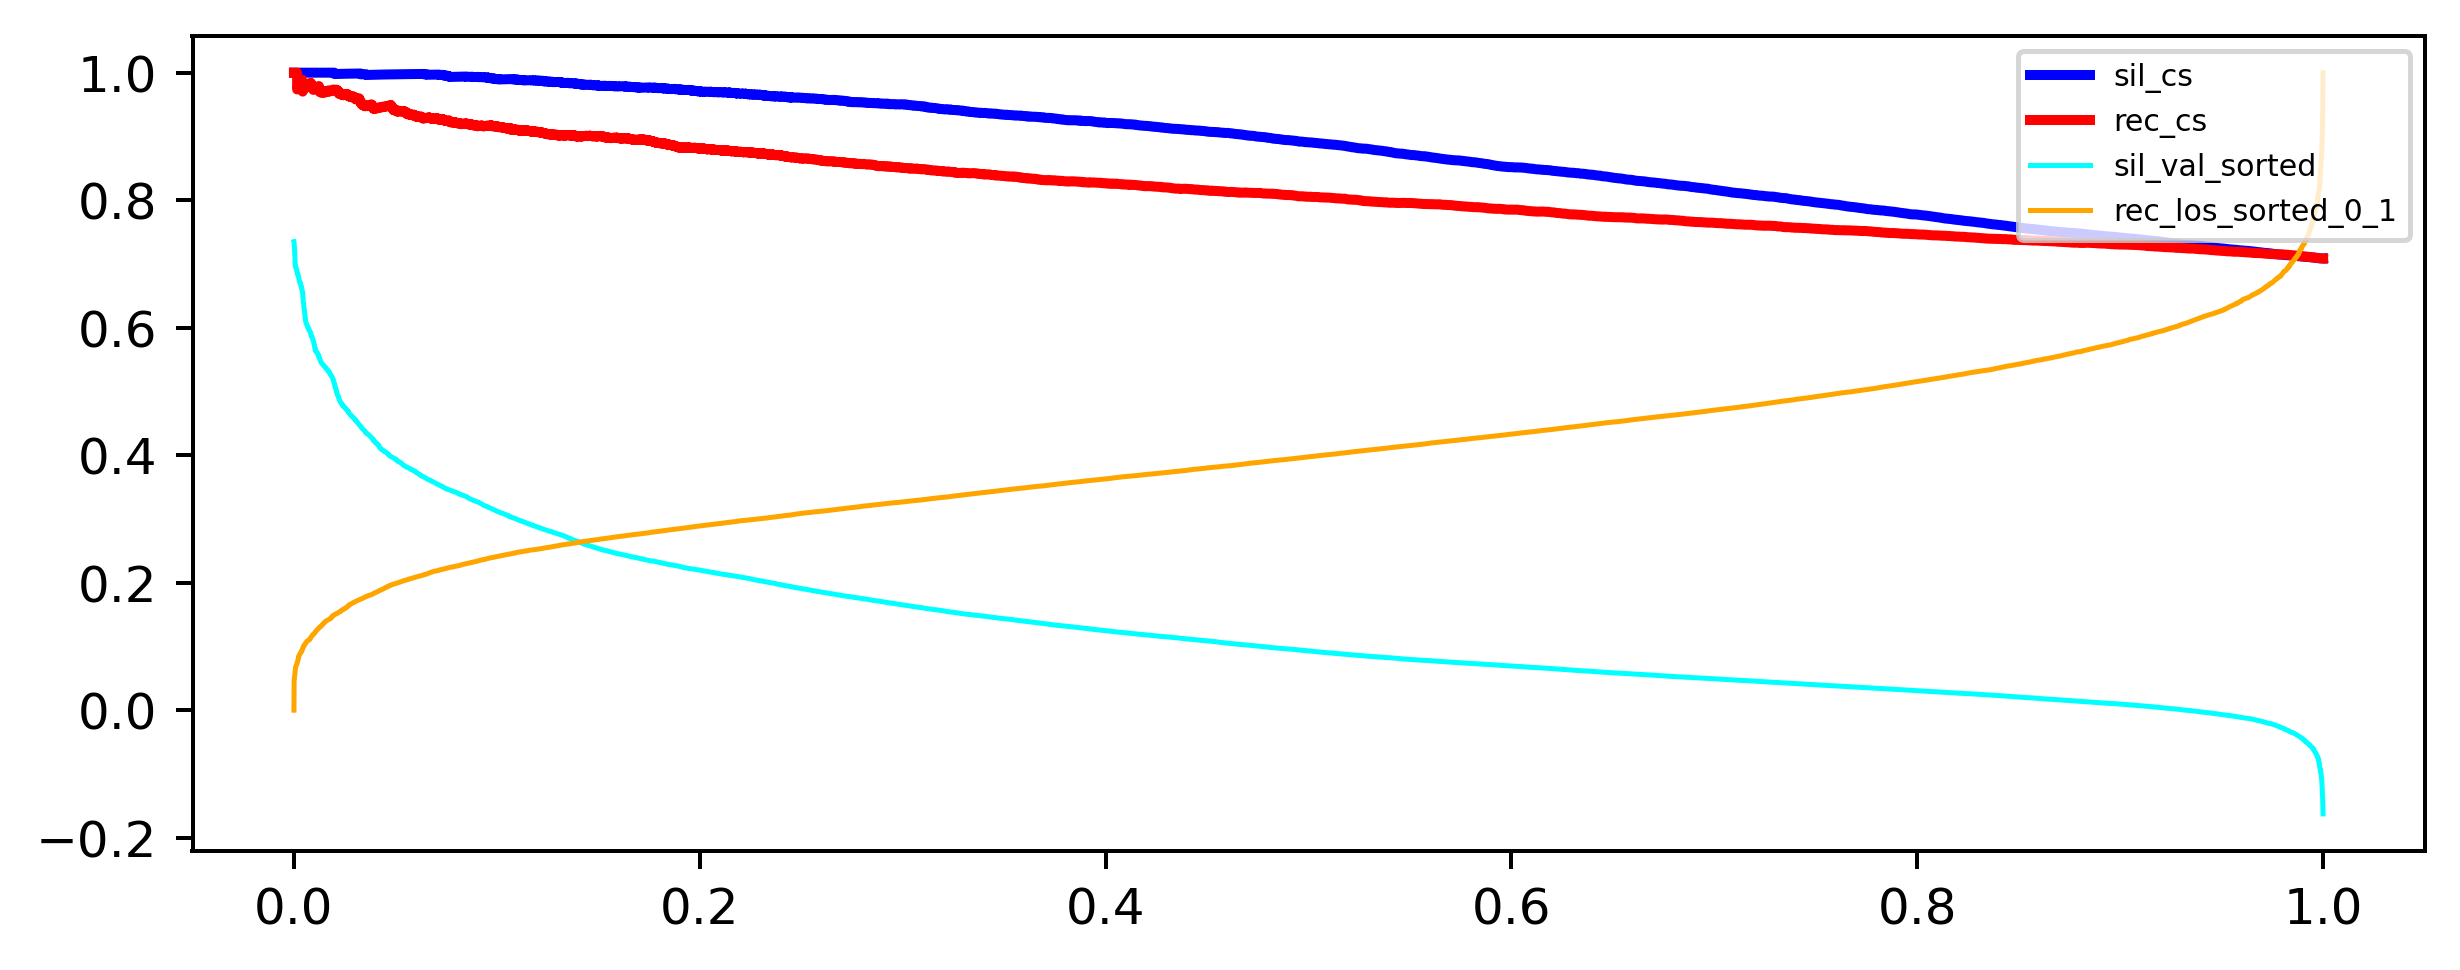

In [218]:
labels = _evs["labels"]
cumsum_preds_sil = funcH.cumsum_preds(labels, predictions_mapped, sil_idx)
cumsum_preds_rec = funcH.cumsum_preds(labels, predictions_mapped, rec_idx)
data_perc_vec = np.arange(0, len(cumsum_preds_rec)) / len(cumsum_preds_rec)

plt.close('all')
fig, ax = plt.subplots(1, figsize=figsize, dpi=dpi)
ax.plot(data_perc_vec, cumsum_preds_sil, lw=2, label='sil_cs', color='blue', ls='-', zorder=0)
ax.plot(data_perc_vec, cumsum_preds_rec, lw=2, label='rec_cs', color='red', ls='-', zorder=0)
ax.plot(data_perc_vec, sil_val_sorted, lw=1, label='sil_val_sorted', color='cyan', ls='-', zorder=0)
ax.plot(data_perc_vec, rec_los_sorted_0_1, lw=1, label='rec_los_sorted_0_1', color='orange', ls='-', zorder=0)
plt.legend(loc='upper right', prop={'size': 6})
np.mean(rec_los_sorted_0_1)

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
/mnt/SSD_Data/vaesae_experiments_cor/exp_conv_ae_simple_is256_cf543 299
*-*-*
rec_v(0.2),at(1193),acc(93.89)
rec_v(0.3),at(5310),acc(87.33)
rec_v(0.4),at(11762),acc(80.43)
rec_v(0.5),at(17832),acc(75.23)
rec_v(0.6),at(21480),acc(72.59)
rec_v(0.7),at(22830),acc(71.38)
rec_v(0.8),at(23138),acc(70.94)
*-*-*
data_perc(0.1),at(2320),acc(91.5554)
data_perc(0.2),at(4640),acc(88.1060)
data_perc(0.3),at(6960),acc(85.0740)
data_perc(0.4),at(9280),acc(82.6635)
data_perc(0.5),at(11601),acc(80.5292)
data_perc(0.6),at(13921),acc(78.5160)
data_perc(0.7),at(16241),acc(76.4376)
data_perc(0.8),at(18561),acc(74.6310)


{'preds_sorted': array([1.        , 1.        , 1.        , ..., 0.70849138, 0.70850394,
        0.70847341]),
 'data_perc_vec': array([0.00000000e+00, 4.30997328e-05, 8.61994656e-05, ...,
        9.99870701e-01, 9.99913801e-01, 9.99956900e-01])}

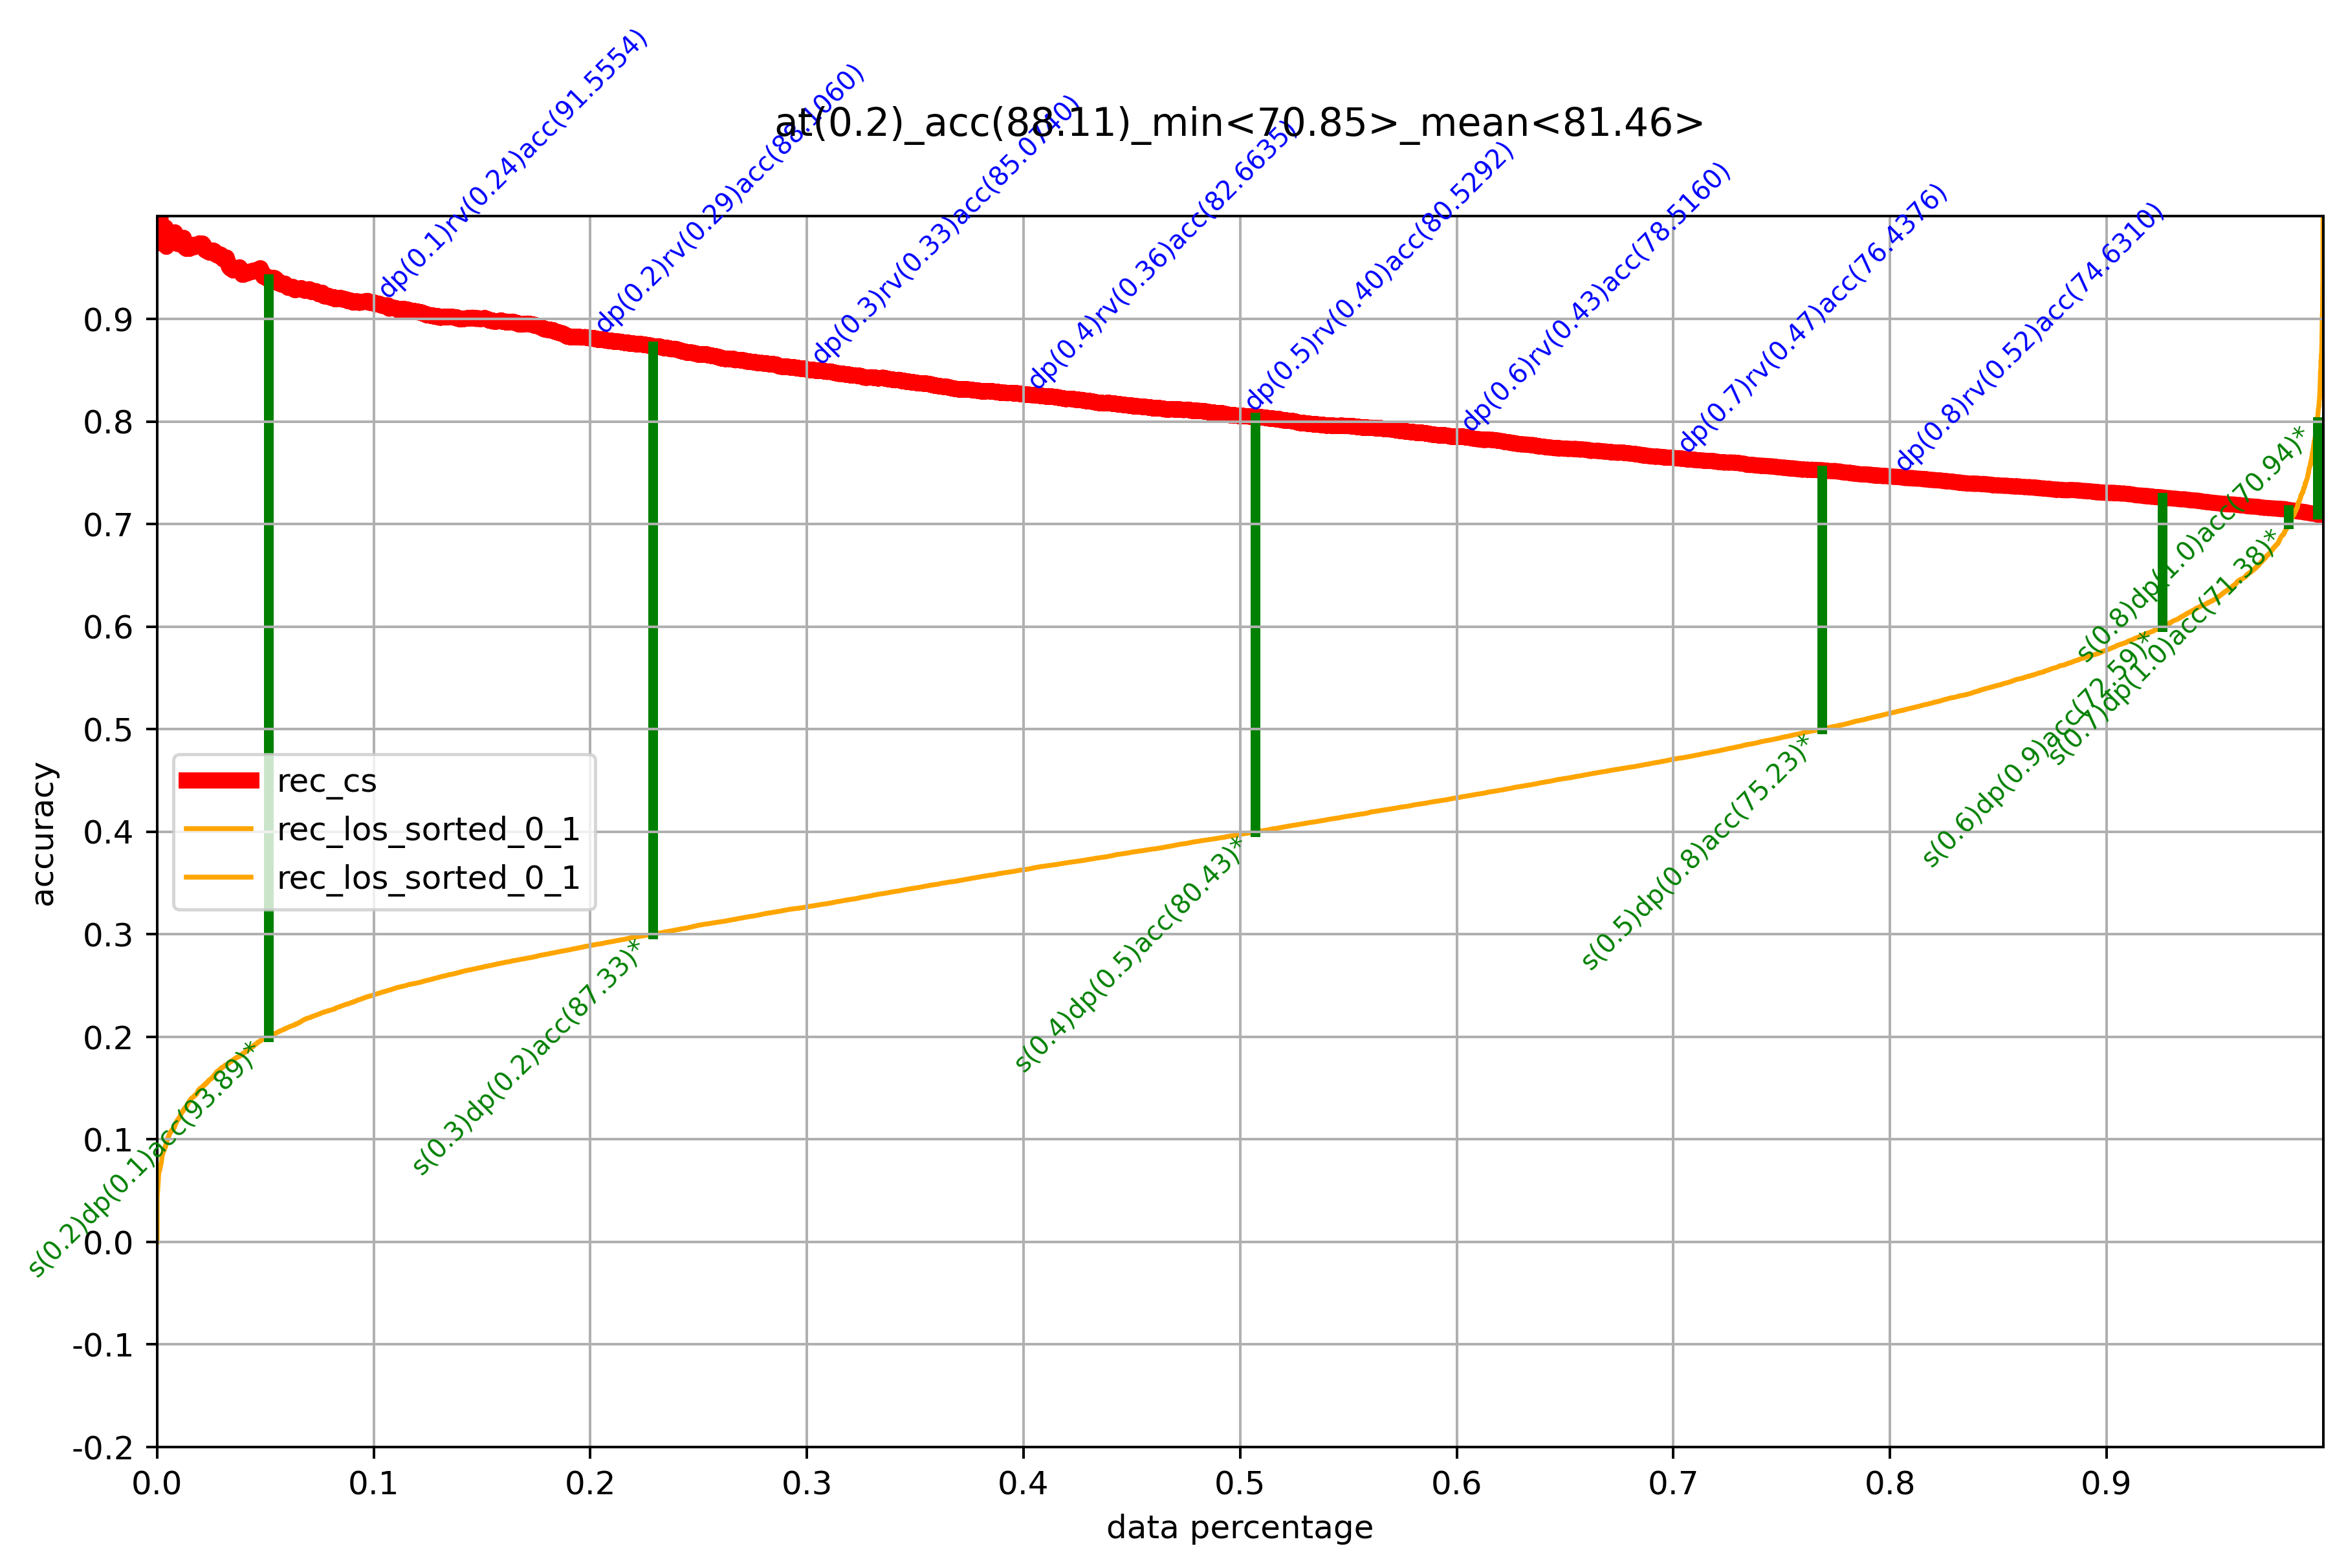

In [219]:
impL.reload(prHF)
_evs = prHF.get_epoch(ep_str='epoch0299', sil_var=sil_var)
epoch_id = 299
print(exp_fold, epoch_id)
save_at_file_name=os.path.join(exp_fold, "plots", "reconstruct_sort_{:03d}_ACCSTR.jpeg".format(epoch_id))
prHF.analyze_reconstruction_values(reconstruction_loss_vec=_evs["reconstruction_loss"], 
                              cluster_labels=_evs["predictions"], real_labels=_evs["labels"],
                              centroid_info_pdf=_evs["kluster_centroids"], save_at_file_name=save_at_file_name,
                              str_size=8, verbose=2)

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(703),acc(97.73)
rec_v(0.3),at(3307),acc(92.99)
rec_v(0.4),at(9198),acc(90.26)
rec_v(0.5),at(15719),acc(88.84)
rec_v(0.6),at(20406),acc(87.59)
rec_v(0.7),at(22494),acc(86.64)
rec_v(0.8),at(23067),acc(86.25)
*-*-*
data_perc(0.1),at(2320),acc(93.9681)
data_perc(0.2),at(4640),acc(91.7690)
data_perc(0.3),at(6960),acc(90.9783)
data_perc(0.4),at(9280),acc(90.2273)
data_perc(0.5),at(11601),acc(89.6828)
data_perc(0.6),at(13921),acc(89.2257)
data_perc(0.7),at(16241),acc(88.6652)
data_perc(0.8),at(18561),acc(88.1371)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(455),acc(89.91)
rec_v(0.3),at(2793),acc(91.16)
rec_v(0.4),at(8813),acc(89.16)
rec_v(0.5),at(15562),acc(87.38

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(931),acc(95.06)
rec_v(0.3),at(3939),acc(91.04)
rec_v(0.4),at(9579),acc(86.14)
rec_v(0.5),at(15639),acc(82.39)
rec_v(0.6),at(20314),acc(79.35)
rec_v(0.7),at(22427),acc(77.64)
rec_v(0.8),at(23044),acc(77.03)
*-*-*
data_perc(0.1),at(2320),acc(92.7617)
data_perc(0.2),at(4640),acc(90.1745)
data_perc(0.3),at(6960),acc(88.1052)
data_perc(0.4),at(9280),acc(86.3916)
data_perc(0.5),at(11601),acc(84.6578)
data_perc(0.6),at(13921),acc(83.3357)
data_perc(0.7),at(16241),acc(81.9234)
data_perc(0.8),at(18561),acc(80.4601)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(1190),acc(95.97)
rec_v(0.3),at(5028),acc(89.76)
rec_v(0.4),at(11415),acc(85.38)
rec_v(0.5),at(17761),acc(82.

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(1842),acc(88.12)
rec_v(0.3),at(7305),acc(84.30)
rec_v(0.4),at(14329),acc(77.31)
rec_v(0.5),at(19910),acc(72.73)
rec_v(0.6),at(22474),acc(70.54)
rec_v(0.7),at(23111),acc(70.02)
*-*-*
data_perc(0.1),at(2320),acc(87.9793)
data_perc(0.2),at(4640),acc(86.6624)
data_perc(0.3),at(6960),acc(84.6286)
data_perc(0.4),at(9280),acc(81.9308)
data_perc(0.5),at(11601),acc(79.3915)
data_perc(0.6),at(13921),acc(77.5894)
data_perc(0.7),at(16241),acc(75.6988)
data_perc(0.8),at(18561),acc(73.7259)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(1313),acc(91.86)
rec_v(0.3),at(5353),acc(86.09)
rec_v(0.4),at(11722),acc(80.41)
rec_v(0.5),at(17755),acc(76.75)
rec_v(0.6),at(21472),acc(7

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(1465),acc(93.93)
rec_v(0.3),at(5677),acc(89.33)
rec_v(0.4),at(11957),acc(83.33)
rec_v(0.5),at(17857),acc(79.11)
rec_v(0.6),at(21576),acc(76.35)
rec_v(0.7),at(22859),acc(75.32)
rec_v(0.8),at(23153),acc(75.01)
*-*-*
data_perc(0.1),at(2320),acc(92.9772)
data_perc(0.2),at(4640),acc(90.7348)
data_perc(0.3),at(6960),acc(88.1626)
data_perc(0.4),at(9280),acc(85.4757)
data_perc(0.5),at(11601),acc(83.4511)
data_perc(0.6),at(13921),acc(81.8273)
data_perc(0.7),at(16241),acc(80.0456)
data_perc(0.8),at(18561),acc(78.5476)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(1122),acc(91.81)
rec_v(0.3),at(4603),acc(88.08)
rec_v(0.4),at(10541),acc(82.38)
rec_v(0.5),at(16438),acc(7

dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(1257),acc(92.85)
rec_v(0.3),at(5380),acc(87.92)
rec_v(0.4),at(11873),acc(81.19)
rec_v(0.5),at(17979),acc(76.61)
rec_v(0.6),at(21589),acc(73.95)
rec_v(0.7),at(22877),acc(72.86)
rec_v(0.8),at(23153),acc(72.63)
*-*-*
data_perc(0.1),at(2320),acc(91.4261)
data_perc(0.2),at(4640),acc(88.7309)
data_perc(0.3),at(6960),acc(86.0796)
data_perc(0.4),at(9280),acc(83.6763)
data_perc(0.5),at(11601),acc(81.4601)
data_perc(0.6),at(13921),acc(79.6509)
data_perc(0.7),at(16241),acc(77.7860)
data_perc(0.8),at(18561),acc(76.0856)
dict_keys(['silhouette_values', 'silhouette_avg', 'reconstruction_loss', 'correspondance_weights', 'predictions', 'labels', 'correspondance_tuple', 'kluster_centroids'])
*-*-*
rec_v(0.2),at(1511),acc(88.82)
rec_v(0.3),at(6125),acc(82.11)
rec_v(0.4),at(12581),acc(74.03)
rec_v(0.5),at(18476),acc(6

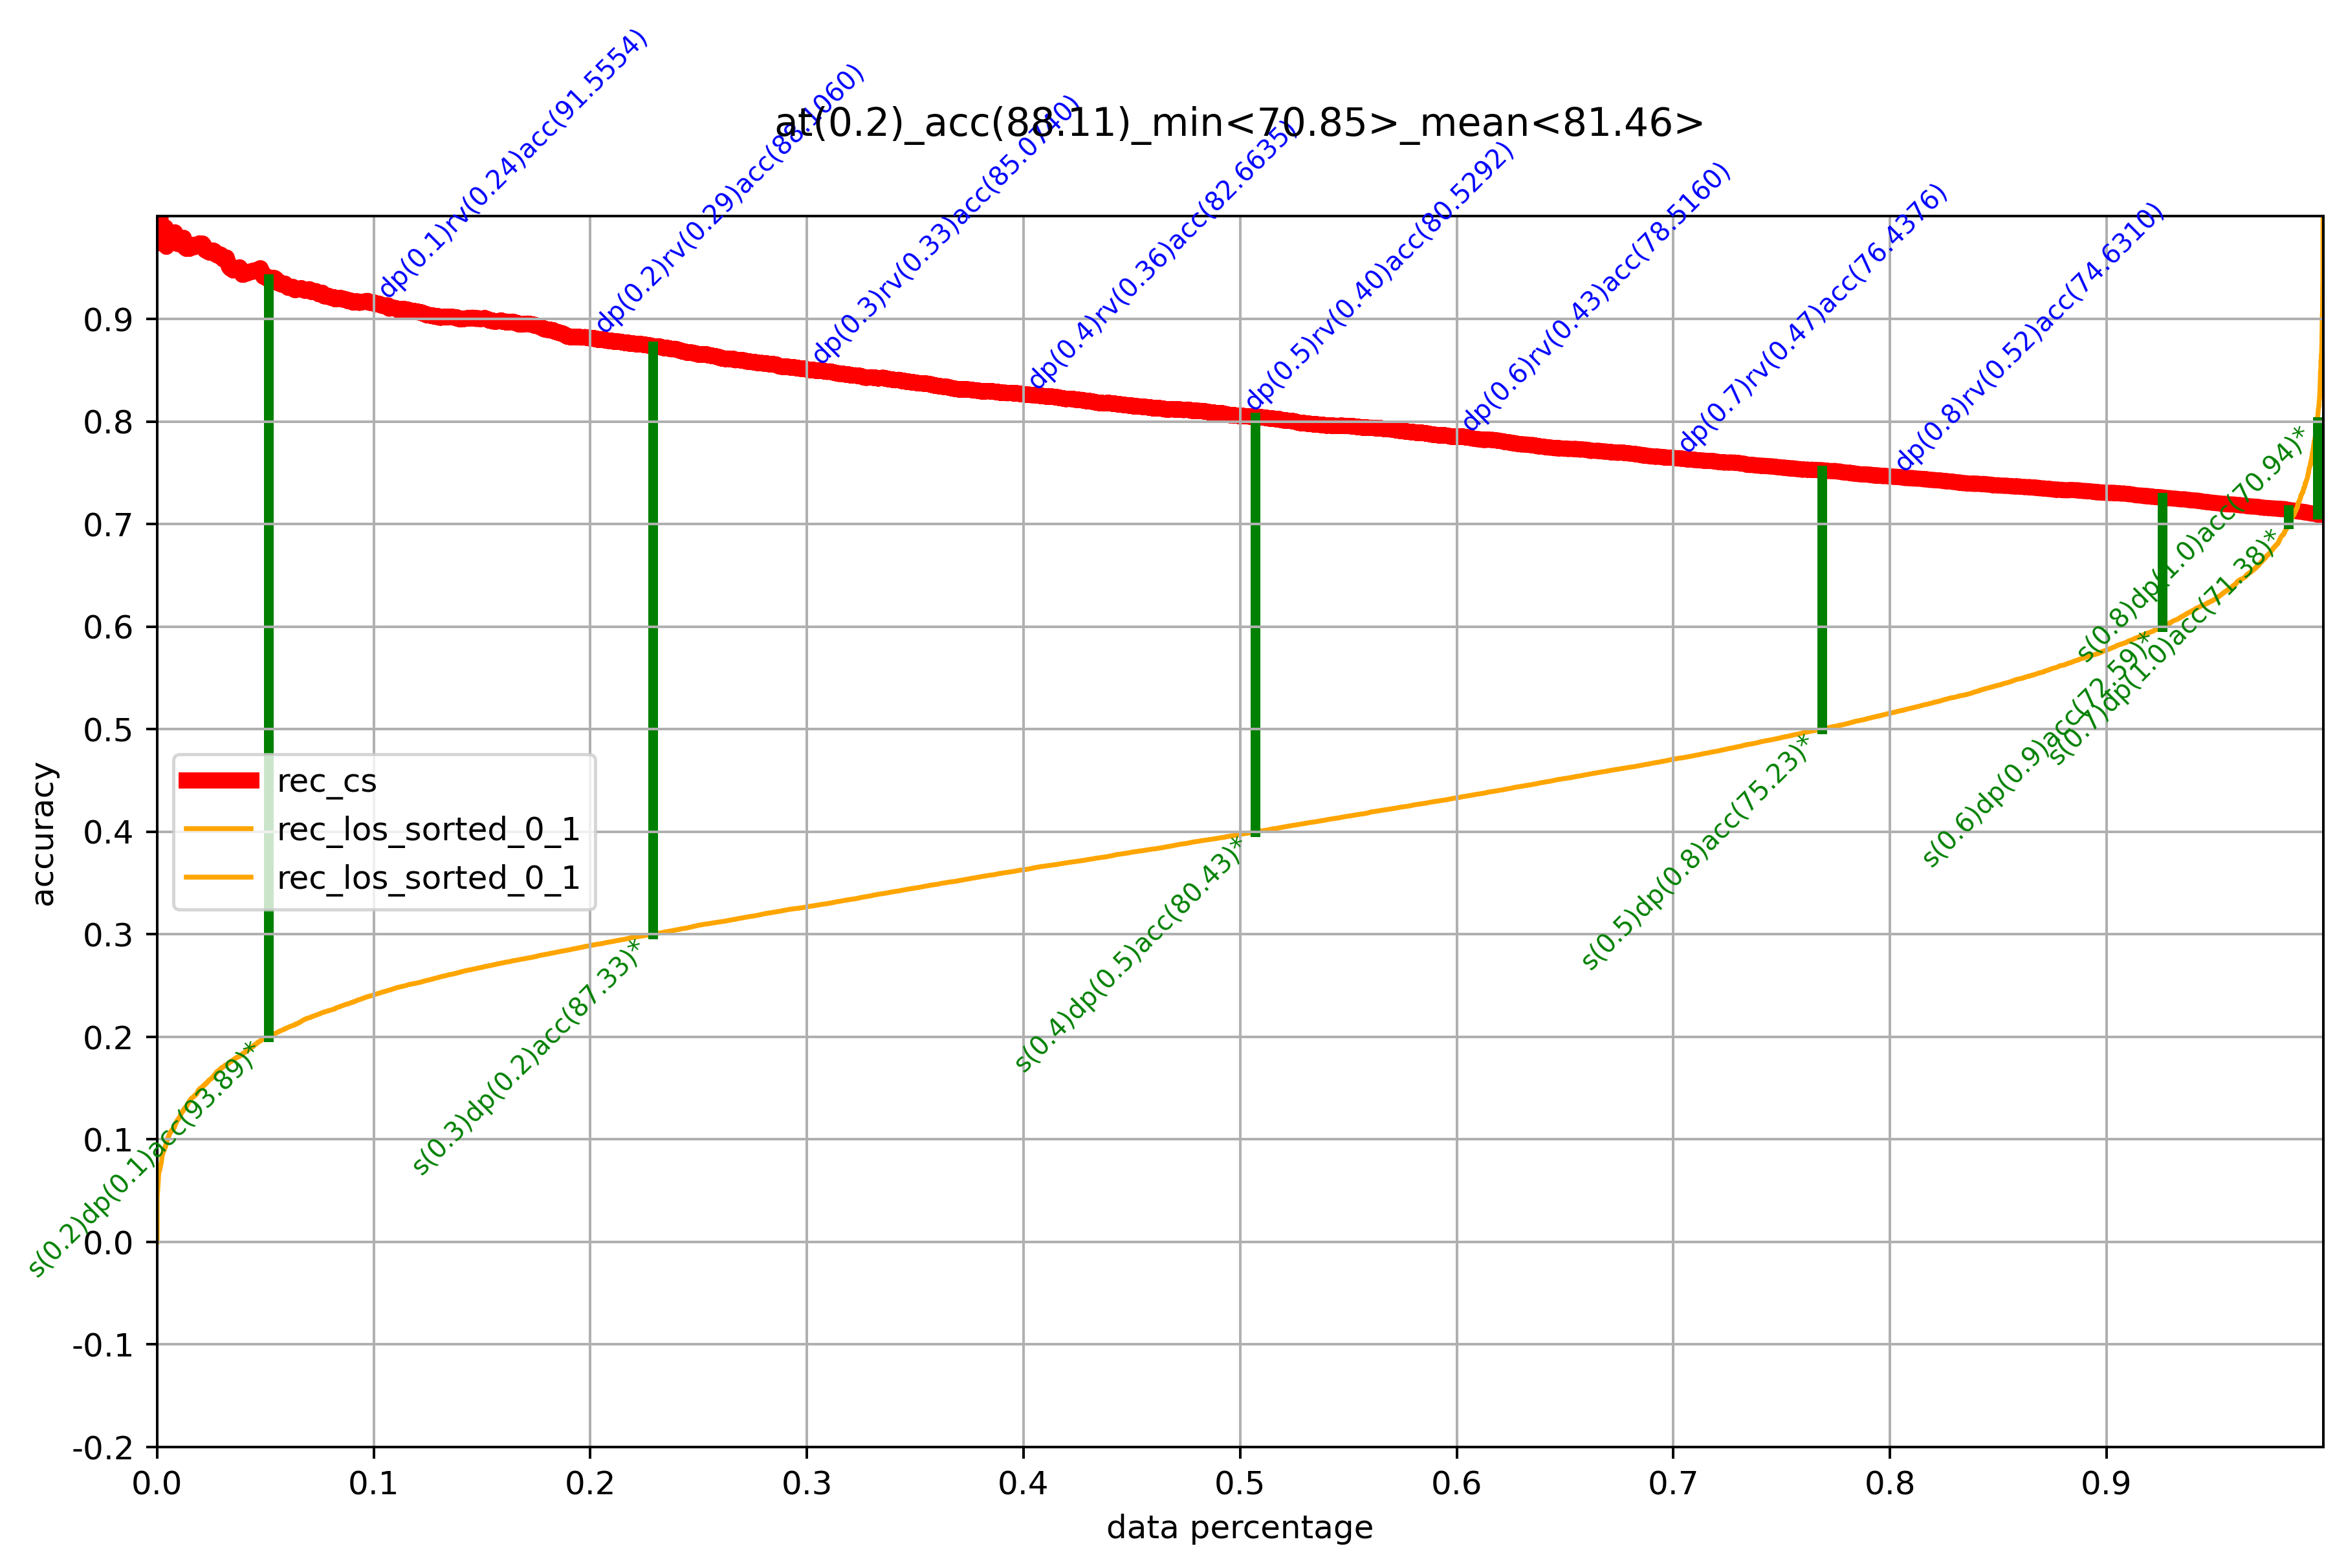

In [220]:
for ep_str in sil_var.keys():
    _evs = prHF.get_epoch(ep_str=ep_str, sil_var=sil_var)
    epoch_id = int(ep_str.replace("epoch", ""))
    save_at_file_name=os.path.join(exp_fold, "plots", "reconstruct_sort_{:03d}_ACCSTR.jpeg".format(epoch_id))
    prHF.analyze_reconstruction_values(reconstruction_loss_vec=_evs["reconstruction_loss"], 
                                  cluster_labels=_evs["predictions"], real_labels=_evs["labels"],
                                  centroid_info_pdf=_evs["kluster_centroids"], save_at_file_name=save_at_file_name,
                                  str_size=8, verbose=2)

In [221]:
sil_val = _evs["silhouette_values"]
sil_val_m = funcH.map_0_1(sil_val)
rec_los = _evs["reconstruction_loss"]
rec_los_m = funcH.map_0_1(rec_los)
cluster_labels=_evs["predictions"]
real_labels=_evs["labels"]
centroid_info_pdf=_evs["kluster_centroids"]
predictions_mapped = funcH.map_predictions(real_labels, cluster_labels, centroid_info_pdf=centroid_info_pdf)
print(np.min(sil_val), np.max(sil_val))
print(np.min(sil_val_m), np.max(sil_val_m))
print(np.min(rec_los), np.max(rec_los))
print(np.min(rec_los_m), np.max(rec_los_m))

-0.16275528 0.7350147
0.0 1.0
37.593056 91.05188
0.0 1.0


v_true: [19, 293, 809, 1960, 3165, 3215, 2804, 2061, 1266, 570, 197, 55, 18, 4, 2]
v_false: [0, 10, 63, 269, 796, 1164, 1447, 1289, 851, 528, 214, 94, 28, 8, 2]


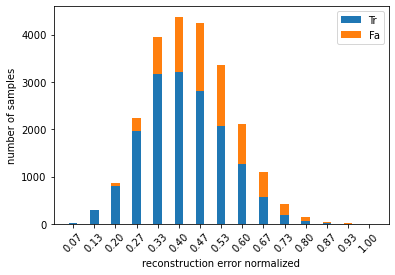

v_true: [10, 93, 1223, 3781, 3394, 2569, 2018, 1107, 880, 544, 323, 213, 154, 70, 58]
v_false: [10, 140, 1604, 3251, 1163, 386, 144, 46, 17, 1, 1, 1, 0, 0, 0]


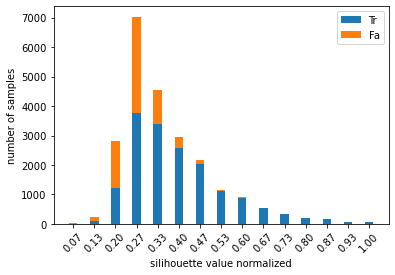

In [223]:
slice_cnt = 15

inds_list_rec, area_blocks = prHF.get_mapped_inds_list(rec_los_m, slice_cnt=slice_cnt, verbose=0)
v_true, v_false = prHF.get_tf_counts_v02(inds_list_rec, predictions_mapped==real_labels)
prHF.plot_single_stacked_bar(v_true, v_false, area_blocks, x_label_str='reconstruction error', width = 0.40)

inds_list_sil, area_blocks = prHF.get_mapped_inds_list(sil_val_m, slice_cnt=slice_cnt, verbose=0)
v_true, v_false = prHF.get_tf_counts_v02(inds_list_sil, predictions_mapped==real_labels)
prHF.plot_single_stacked_bar(v_true, v_false, area_blocks, x_label_str='silihouette value', width = 0.40)

[ 1729  2428  1733 ...   504 11899  8362]
[0.         0.04427315 0.04476895 ... 0.99201494 0.9992813  1.        ]
23202
0 0 1548 -- [ 1729  2428  1733 ... 20507 13346  3546] 1547
1 1548 3095 -- [ 1805 12704 14369 ...  1624  2827 18288] 1546
2 3095 4641 -- [13470  1644  8762 ... 12373  6313 14532] 1545
3 4641 6188 -- [ 9144 10270 19092 ... 15061 22915  5713] 1546
4 6188 7735 -- [14333 17082 16478 ...  1070  4232  6812] 1546
5 7735 9282 -- [10240  4668  5998 ... 22551 16819 17089] 1546
6 9282 10829 -- [10581  3030 23183 ... 18423  2650  4637] 1546
7 10829 12375 -- [ 1467  1095  6215 ... 22469 20316 21809] 1545
8 12375 13922 -- [11177 16119 11171 ... 14640 19794 10114] 1546
9 13922 15469 -- [ 7186 10096 10925 ... 17970 14552 18237] 1546
10 15469 17016 -- [ 9254 22474 20570 ... 19084 10679 17861] 1546
11 17016 18563 -- [7692 8265 2875 ... 7094  153 5775] 1546
12 18563 20109 -- [ 2852 11061  8337 ... 11667 11837  1216] 1545
13 20109 21656 -- [ 7249 17662  1033 ... 14549  7493  9185] 1546
14

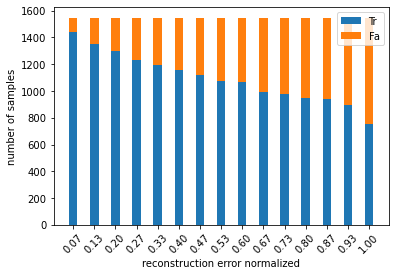

[17418  5874  1853 ... 13897 13932 13899]
[0.         0.00662676 0.01266258 ... 0.99742454 0.99948615 1.        ]
23202
0 0 1548 -- [17418  5874  1853 ...  3886 16147  8909] 1547
1 1548 3095 -- [ 8817 16968 12195 ... 21521  4851  9432] 1546
2 3095 4641 -- [ 9059 21275   627 ...   808  6666 16097] 1545
3 4641 6188 -- [16636  8255 12553 ...  5469 22142 14753] 1546
4 6188 7735 -- [ 7372  5196 14548 ... 19816 10850 16370] 1546
5 7735 9282 -- [17334 17357  1053 ...  3418 13587 22160] 1546
6 9282 10829 -- [ 7406  2650 15513 ...  3934 13957 13089] 1546
7 10829 12375 -- [17540  2135    12 ... 20368 19321 13777] 1545
8 12375 13922 -- [13119 15435 22457 ... 10521  9007  7801] 1546
9 13922 15469 -- [ 4795  4518 15110 ...   743  6163  3643] 1546
10 15469 17016 -- [22809 22981 11178 ... 10342  8524  2155] 1546
11 17016 18563 -- [ 1669 12337 21513 ...  6599  9764 22812] 1546
12 18563 20109 -- [   88 22098 14606 ...  8877  4285  4136] 1545
13 20109 21656 -- [12935  9923  4277 ... 14281 14234  3818] 1

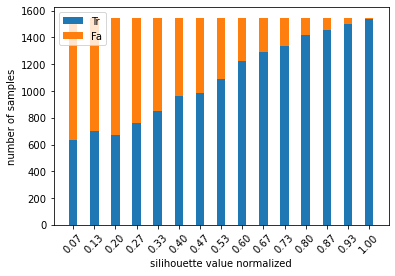

In [224]:
inds_list_rec_cr, area_blocks_cr = prHF.get_mapped_inds_list_by_count(rec_los_m, slice_cnt=slice_cnt, verbose=1)
v_true_cr, v_false_cr = prHF.get_tf_counts_v02(inds_list_rec_cr, predictions_mapped==real_labels)
prHF.plot_single_stacked_bar(v_true_cr, v_false_cr, area_blocks_cr, x_label_str='reconstruction error', width = 0.40)

inds_list_sil_cs, area_blocks_cs = prHF.get_mapped_inds_list_by_count(sil_val_m, slice_cnt=slice_cnt, verbose=1)
v_true_cs, v_false_cs = prHF.get_tf_counts_v02(inds_list_sil_cs, predictions_mapped==real_labels)
prHF.plot_single_stacked_bar(v_true_cs, v_false_cs, area_blocks_cs, x_label_str='silihouette value', width = 0.40)

In [225]:
cnt_mat_true, cnt_mat_fals, cnt_mat_prc = prHF.get_tf_counts_v01(inds_list_rec, inds_list_sil, predictions_mapped==real_labels)

In [226]:
cnt_mat_true_c, cnt_mat_fals_c, cnt_mat_prc_c = prHF.get_tf_counts_v01(inds_list_rec_cr, inds_list_sil_cs, predictions_mapped==real_labels)

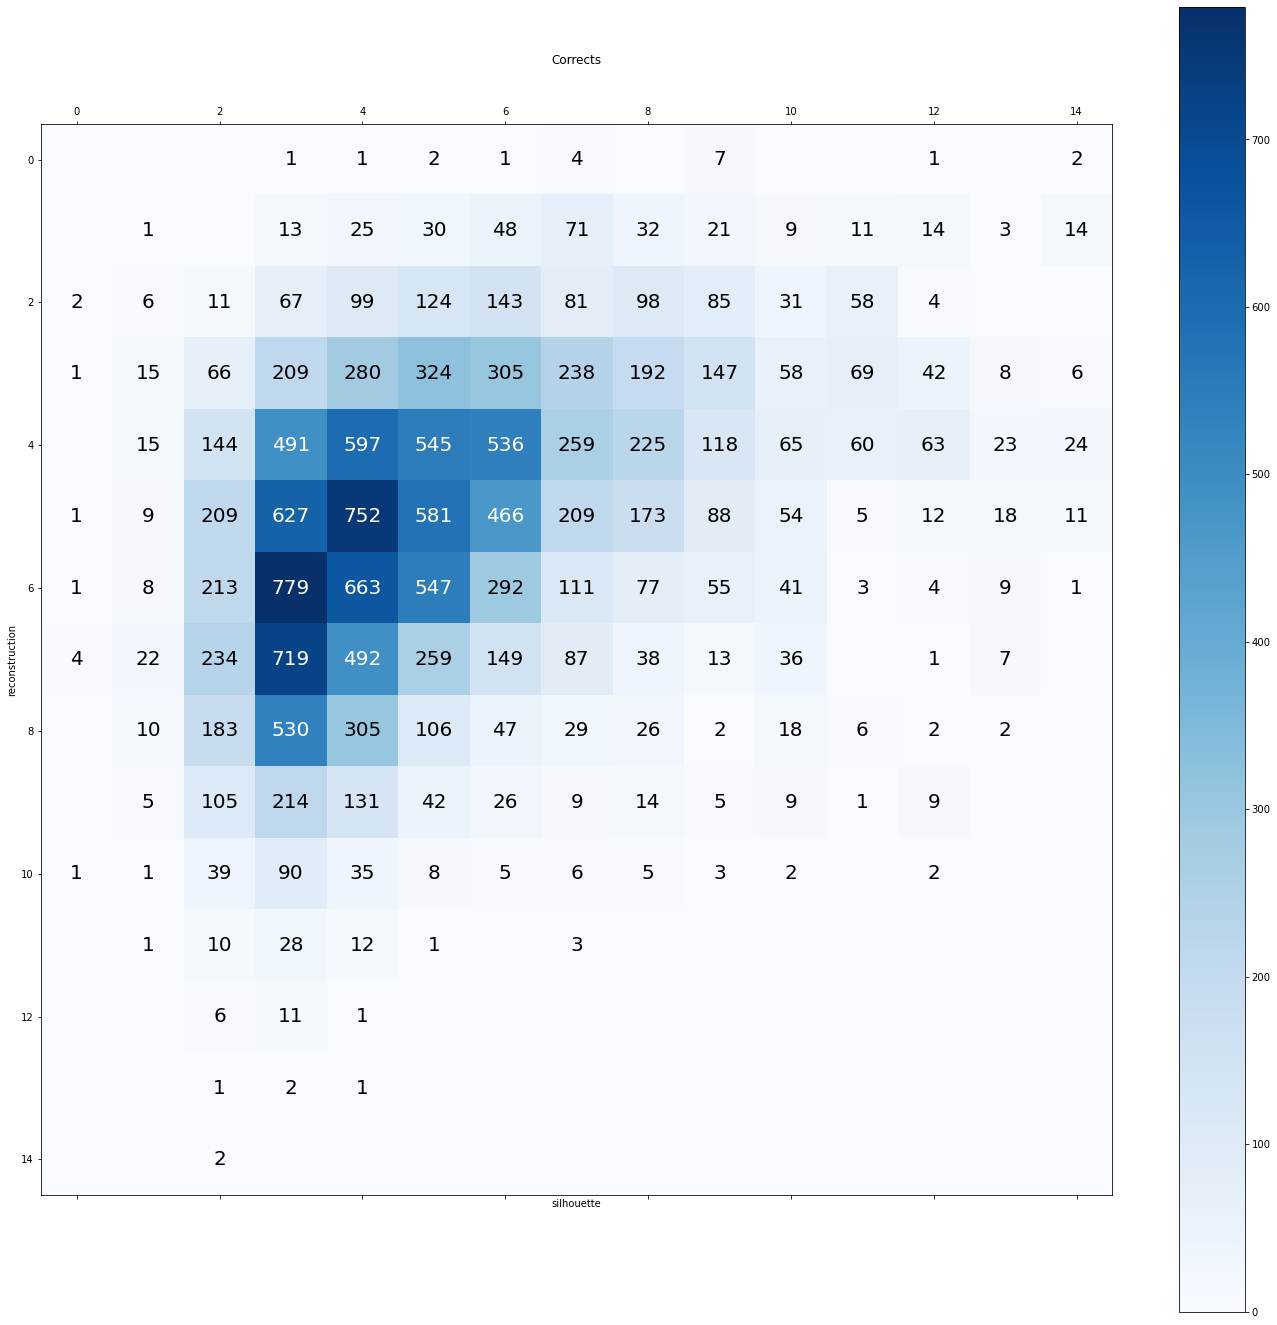

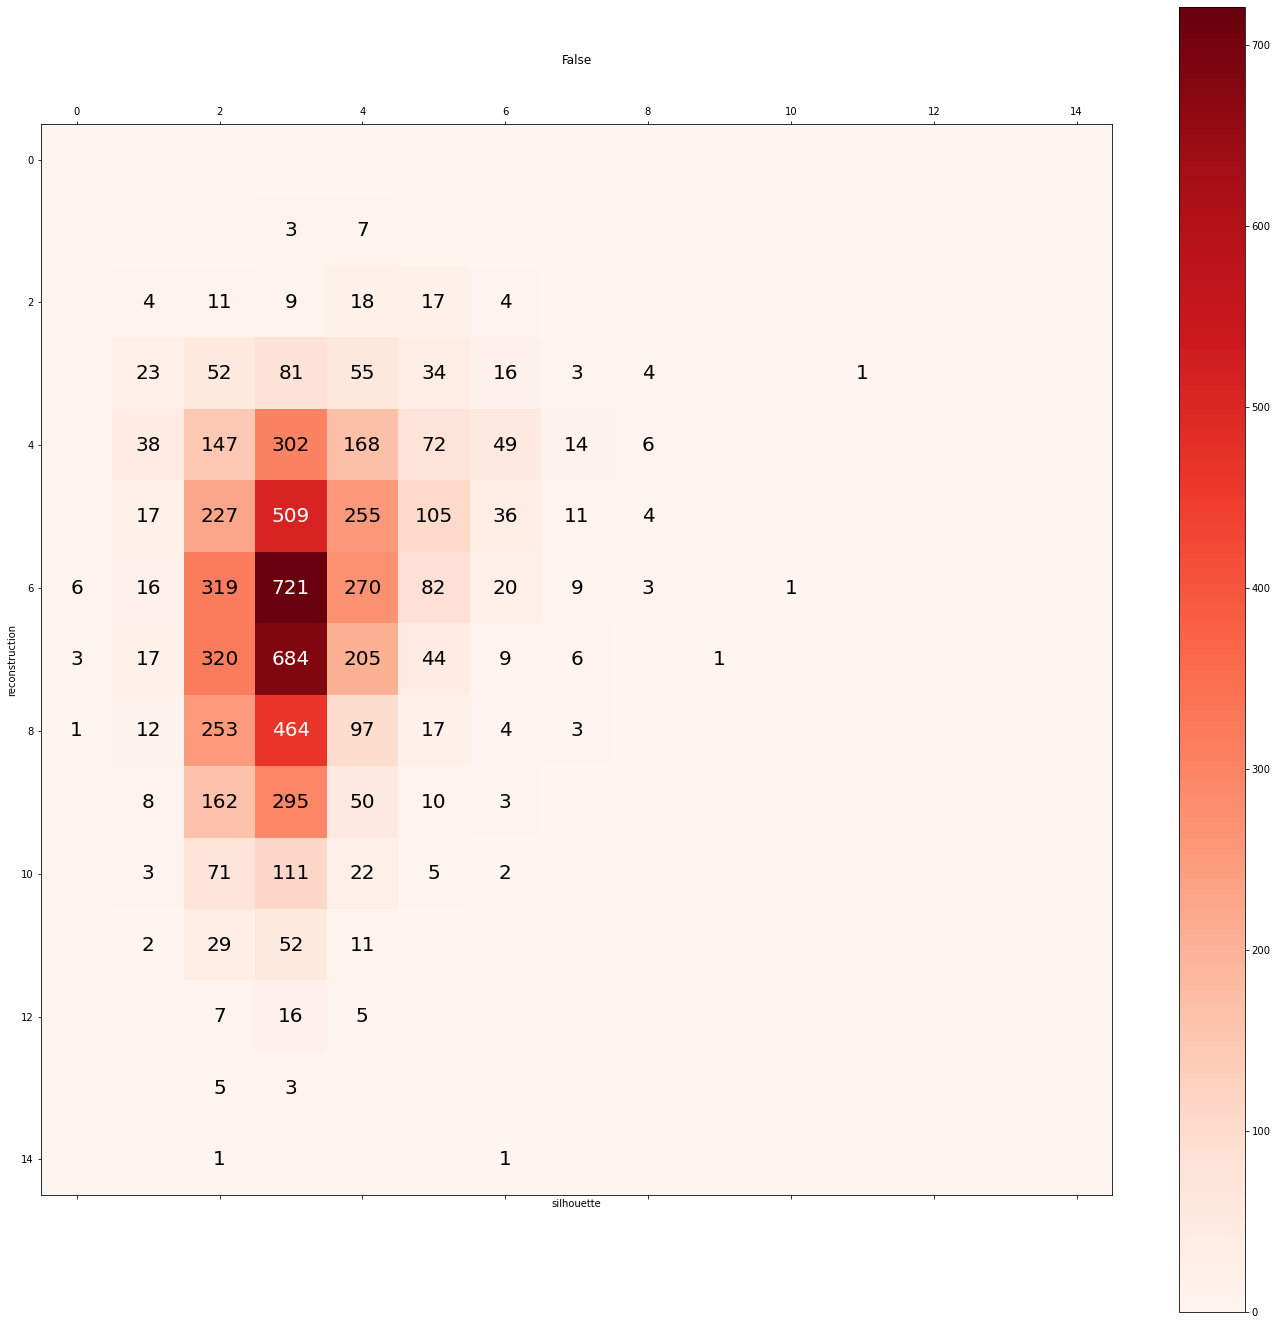

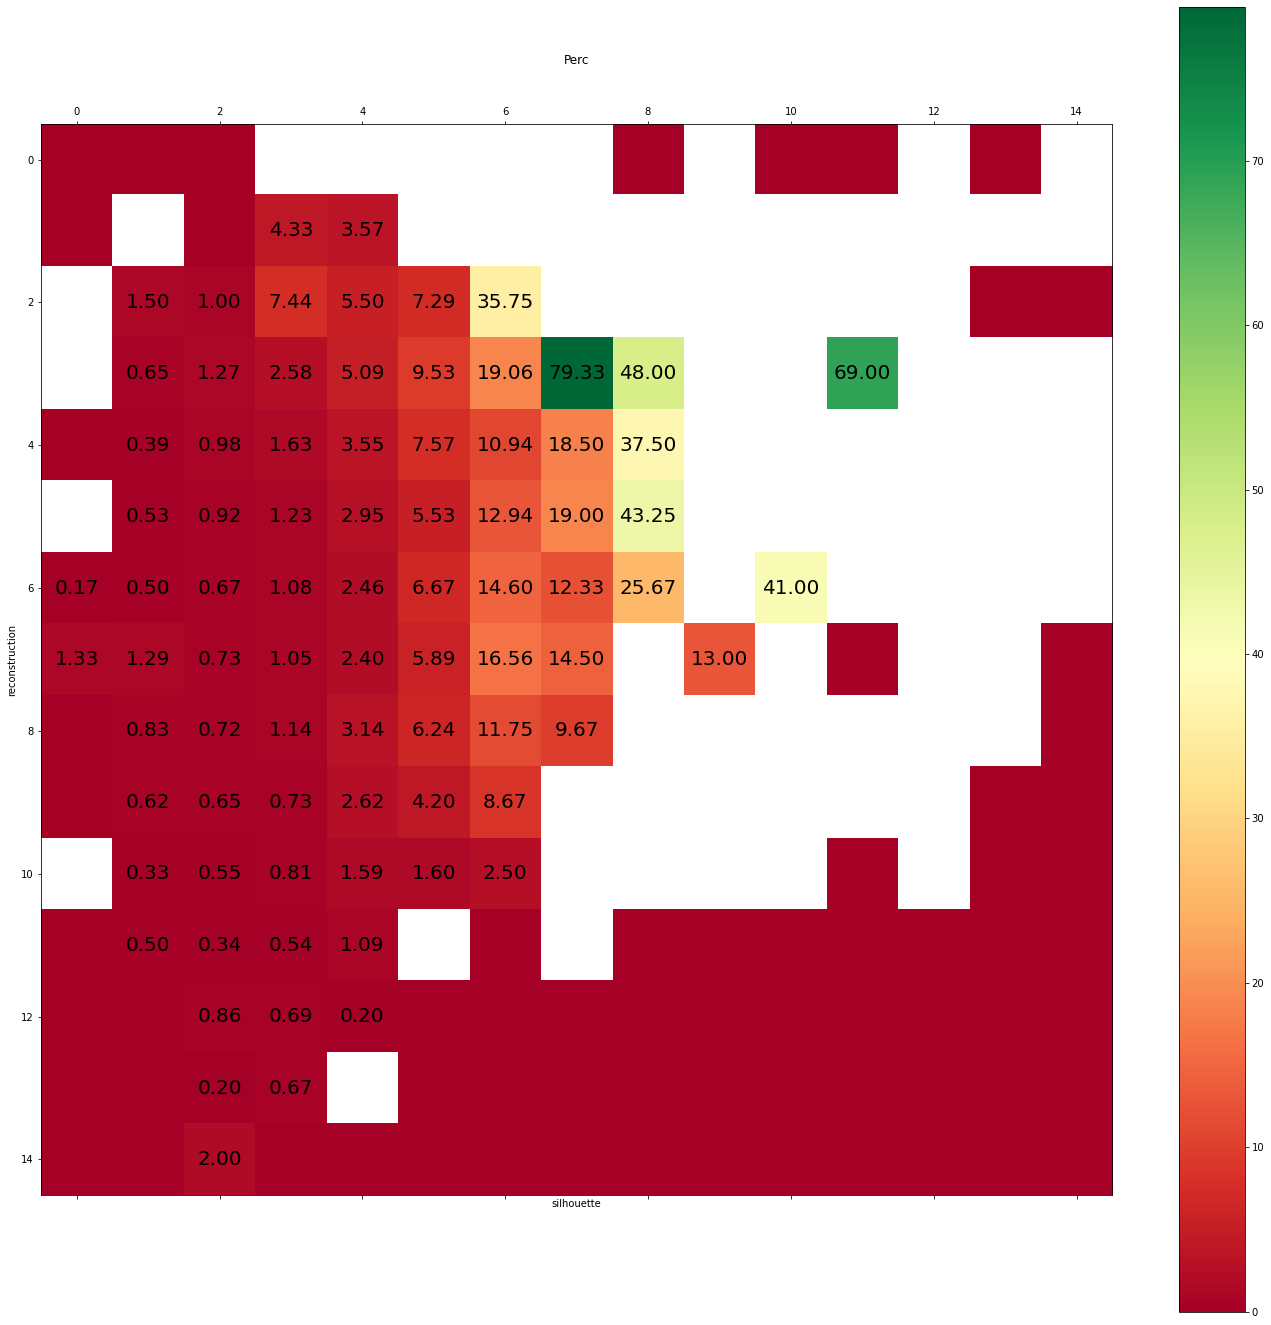

In [227]:
prHF.plot_rec_silh_intersect_vals(conf_mat=cnt_mat_true, title_str='Corrects', figsize=(24,24), cmap = plt.cm.Blues)
prHF.plot_rec_silh_intersect_vals(conf_mat=cnt_mat_fals, title_str='False',figsize=(24,24), cmap = plt.cm.Reds)
prHF.plot_rec_silh_intersect_vals(conf_mat=cnt_mat_prc.copy(), title_str='Perc',figsize=(24,24), cmap = plt.cm.RdYlGn, _val_char='3.2f', max_allowed=None)

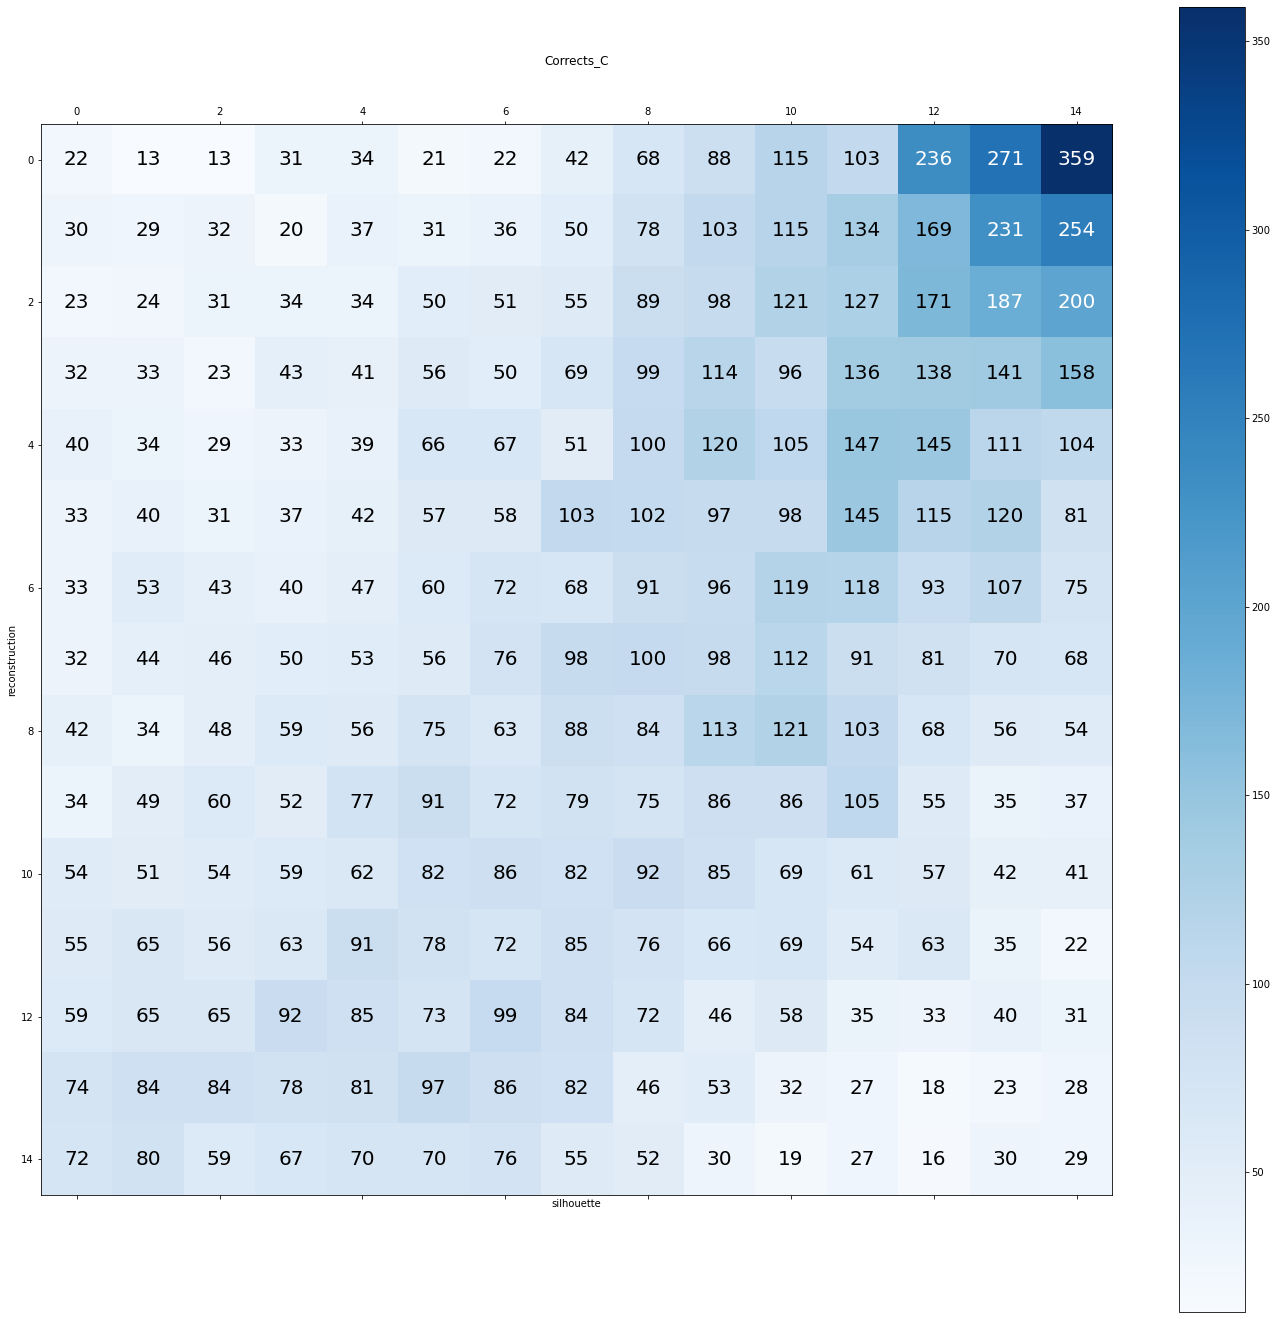

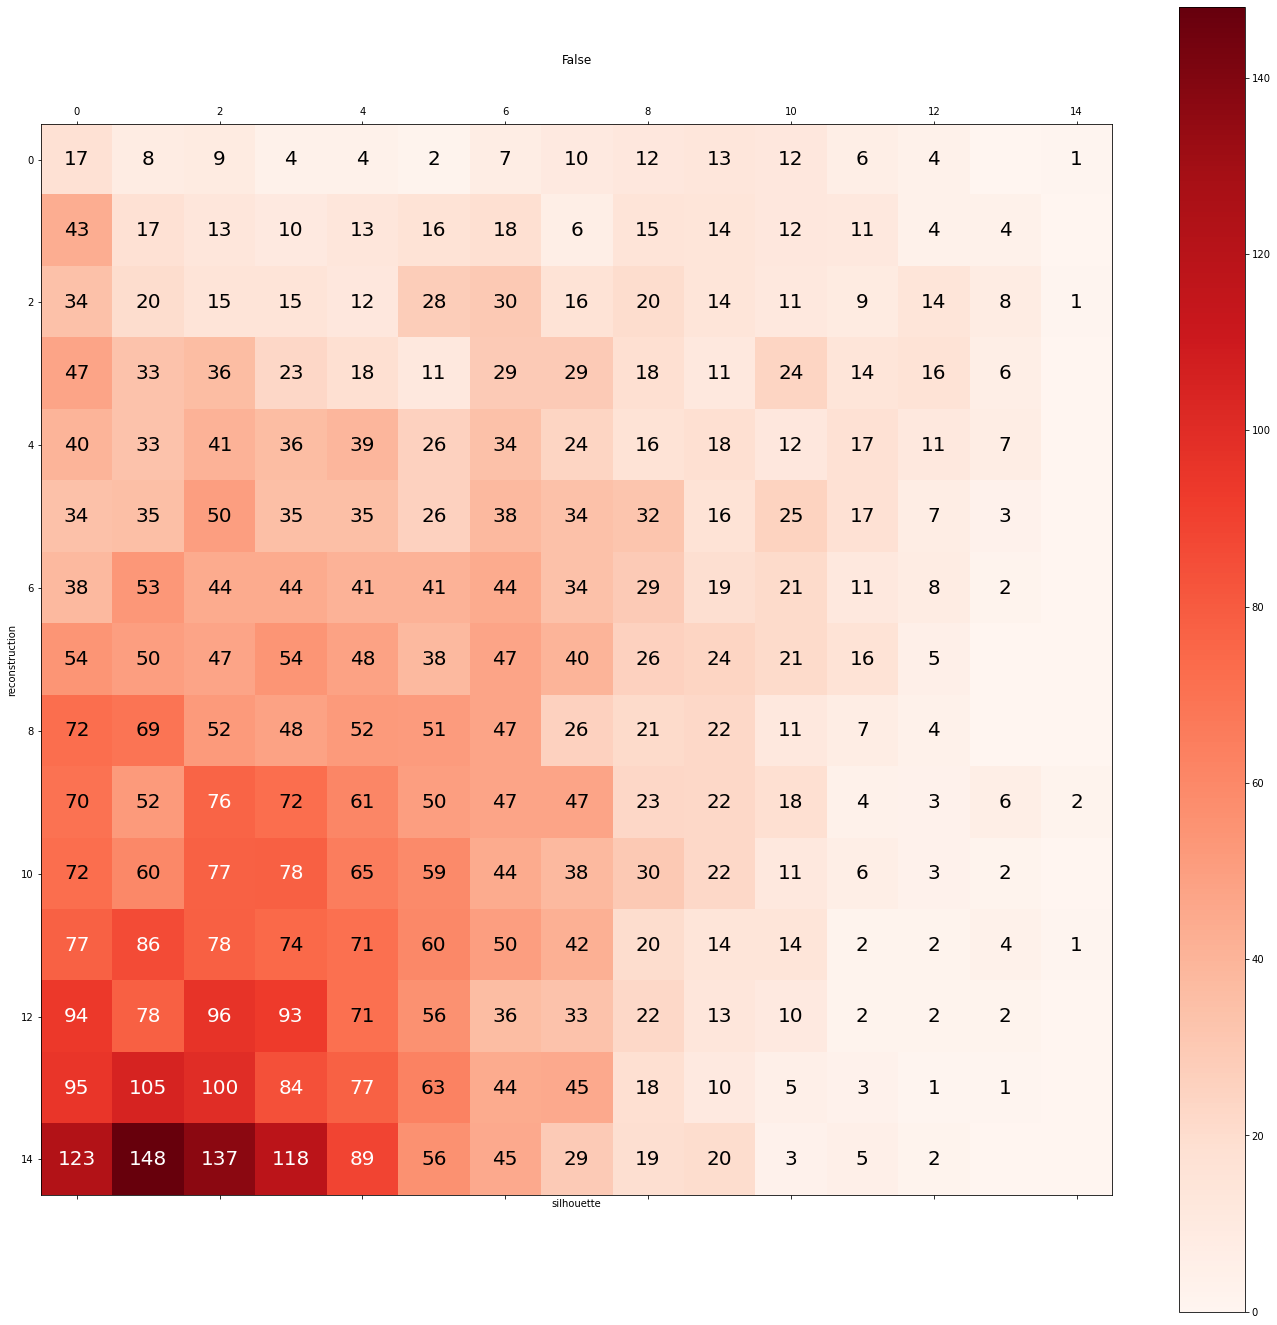

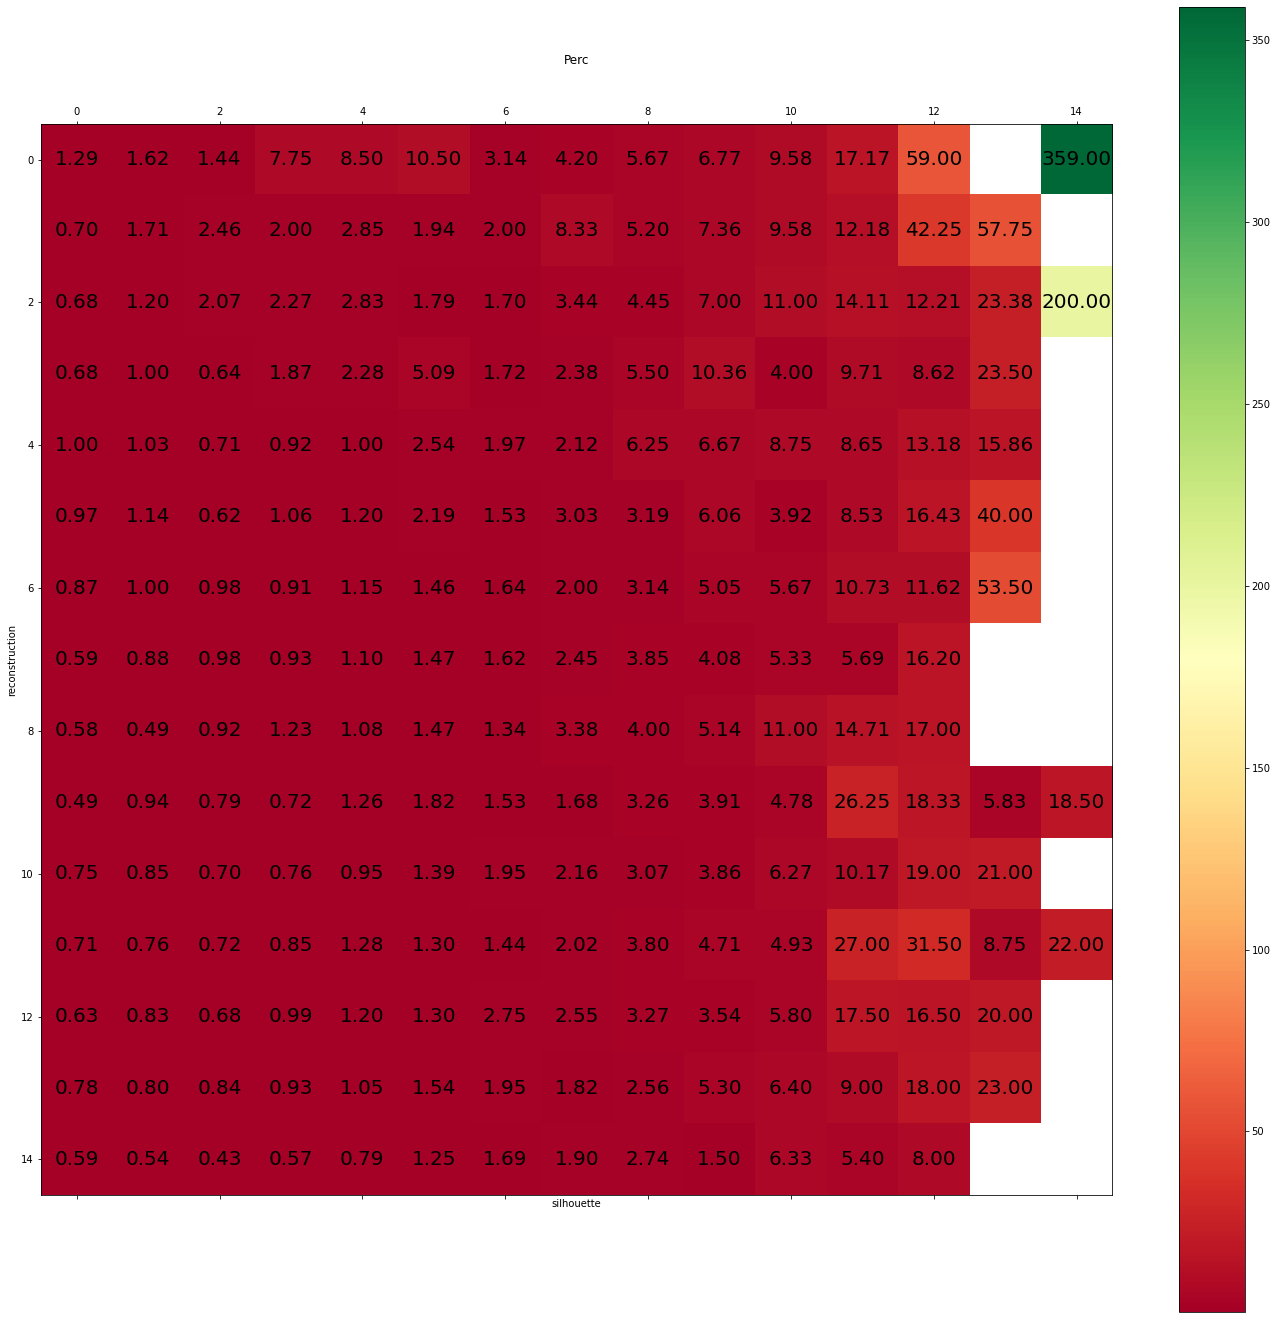

In [228]:
prHF.plot_rec_silh_intersect_vals(conf_mat=cnt_mat_true_c, title_str='Corrects_C', figsize=(24,24), cmap = plt.cm.Blues)
prHF.plot_rec_silh_intersect_vals(conf_mat=cnt_mat_fals_c, title_str='False',figsize=(24,24), cmap = plt.cm.Reds)
prHF.plot_rec_silh_intersect_vals(conf_mat=cnt_mat_prc_c.copy(), title_str='Perc',figsize=(24,24), cmap = plt.cm.RdYlGn, _val_char='3.2f', max_allowed=None)

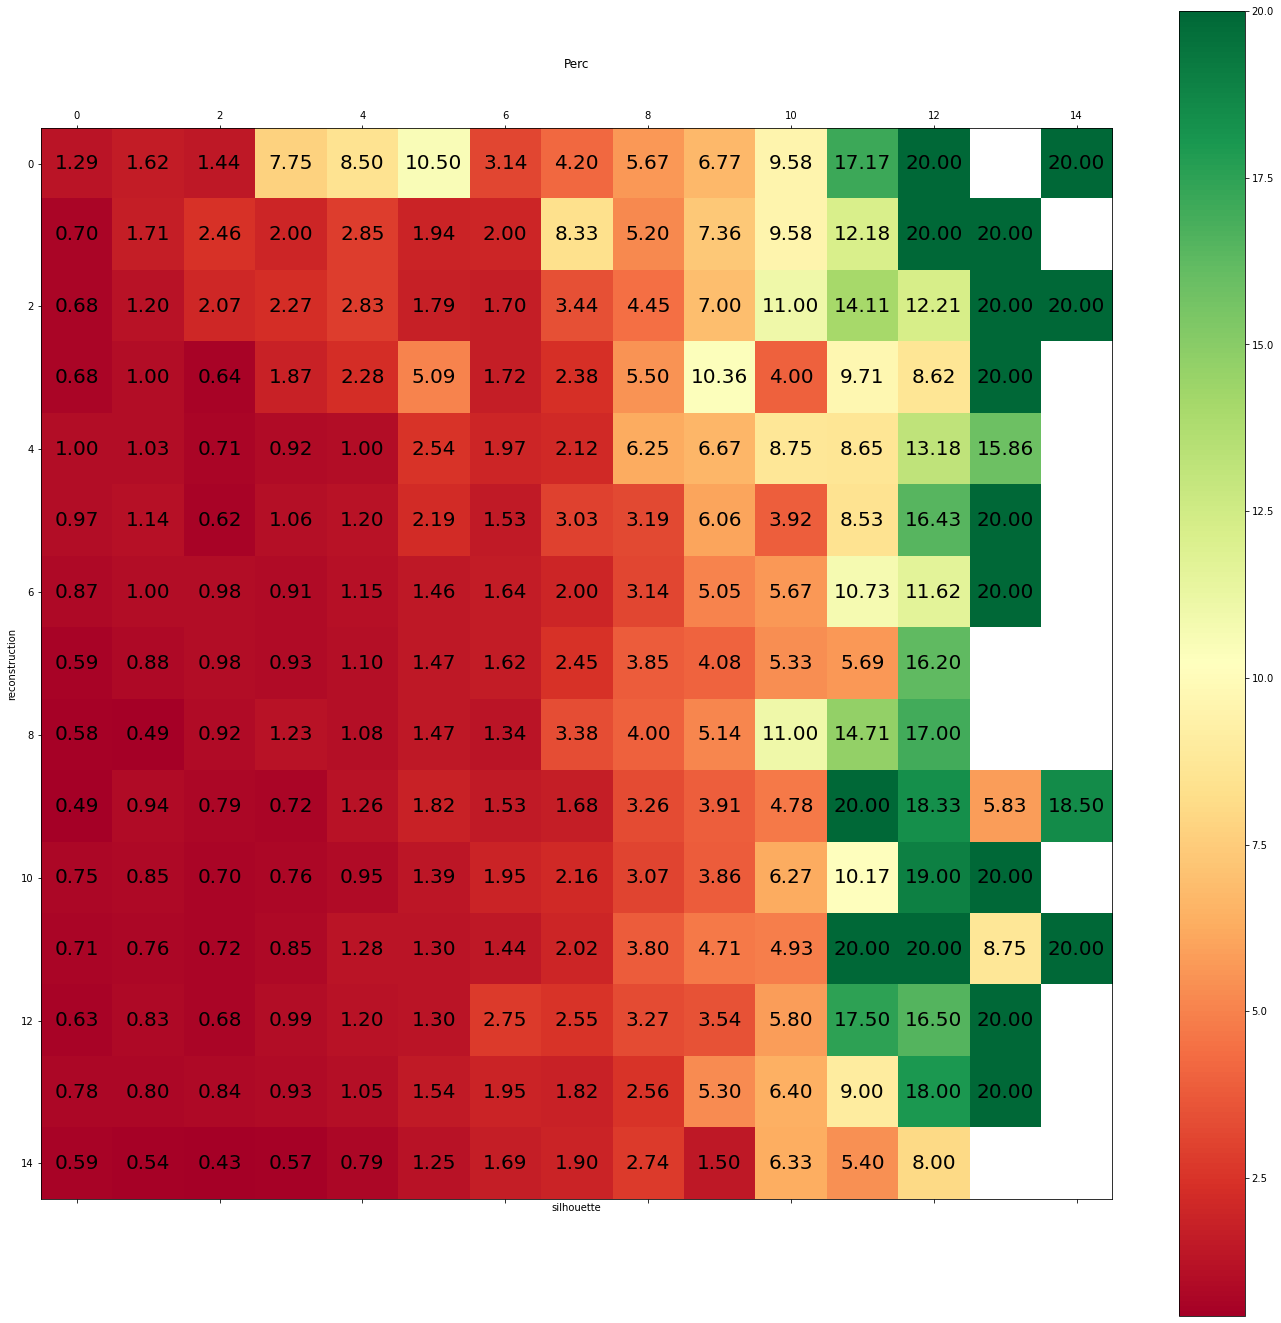

In [229]:
prHF.plot_rec_silh_intersect_vals(conf_mat=cnt_mat_prc_c.copy(), title_str='Perc',figsize=(24,24), cmap = plt.cm.RdYlGn, _val_char='3.2f', max_allowed=20)